In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%matplotlib inline

# Quant basics

Bem vindo ao projetinho do Turing Quant!

Neste notebook você aprenderá os seguinte assuntos:

- Importação e visualização de dados financeiros
- Retornos e Risco de um ativo
- Análise de portfólios
- Previsão de Series Temporais

In [3]:
import pandas as pd
from datetime import datetime as dt
import numpy as np

In [4]:
from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.dates as mdates

In [5]:
plt.style.use('fivethirtyeight')

mpl.rcParams['figure.figsize'] = (40,10)

font = {'weight' : 'bold',
        'size'   : 16}
        
mpl.rc('font', **font)

## 1. Importação de dataset de preço histórico

Para a importação de dados existem diversas bibliotecas em python que fornem preços históricos de ativos

Dentre elas podemos citar as seguinte plataformas:

- Google Finance (Via panda_datareader)
- Yahoo Finace (Via panda_datareader ou yfinance)
- Quandl
- Investing.com (investpy)

Pesquise sobre como importar dados nessas bibliotecas. Os datasets que conseguimos com essas bibliotecas são denominados OHLCV (open-high-low-close-volume).

- 1.1) Plote os preços de fechamento
- 1.2) Faça uma simples análise qualitativa do ativo escolhido (Ex: porque ele teve grande variação em algum momento)

In [6]:
#!pip install investpy

In [7]:
import investpy

In [8]:
df_stock = investpy.get_stock_historical_data(stock='NFLX34', 
                                              country='brazil', 
                                              from_date='01/01/2015', 
                                              to_date='01/08/2021')

In [9]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 937 entries, 2015-01-13 to 2021-07-30
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Open      937 non-null    float64
 1   High      937 non-null    float64
 2   Low       937 non-null    float64
 3   Close     937 non-null    float64
 4   Volume    937 non-null    int64  
 5   Currency  937 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 51.2+ KB


In [10]:
df_stock.head(10)

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2015-01-13,2.44,2.44,2.44,2.44,35000,BRL
2015-01-14,2.40,2.40,2.40,2.40,35000,BRL
2015-01-20,2.55,2.55,2.55,2.55,140000,BRL
2015-01-22,3.08,3.08,3.08,3.08,175000,BRL
2015-01-23,3.23,3.23,3.23,3.23,35000,BRL
2015-02-04,3.53,3.54,3.53,3.54,140000,BRL
2015-02-11,3.75,3.75,3.75,3.75,35000,BRL
2015-02-12,3.67,3.67,3.67,3.67,35000,BRL
2015-03-03,3.94,3.94,3.94,3.94,70000,BRL


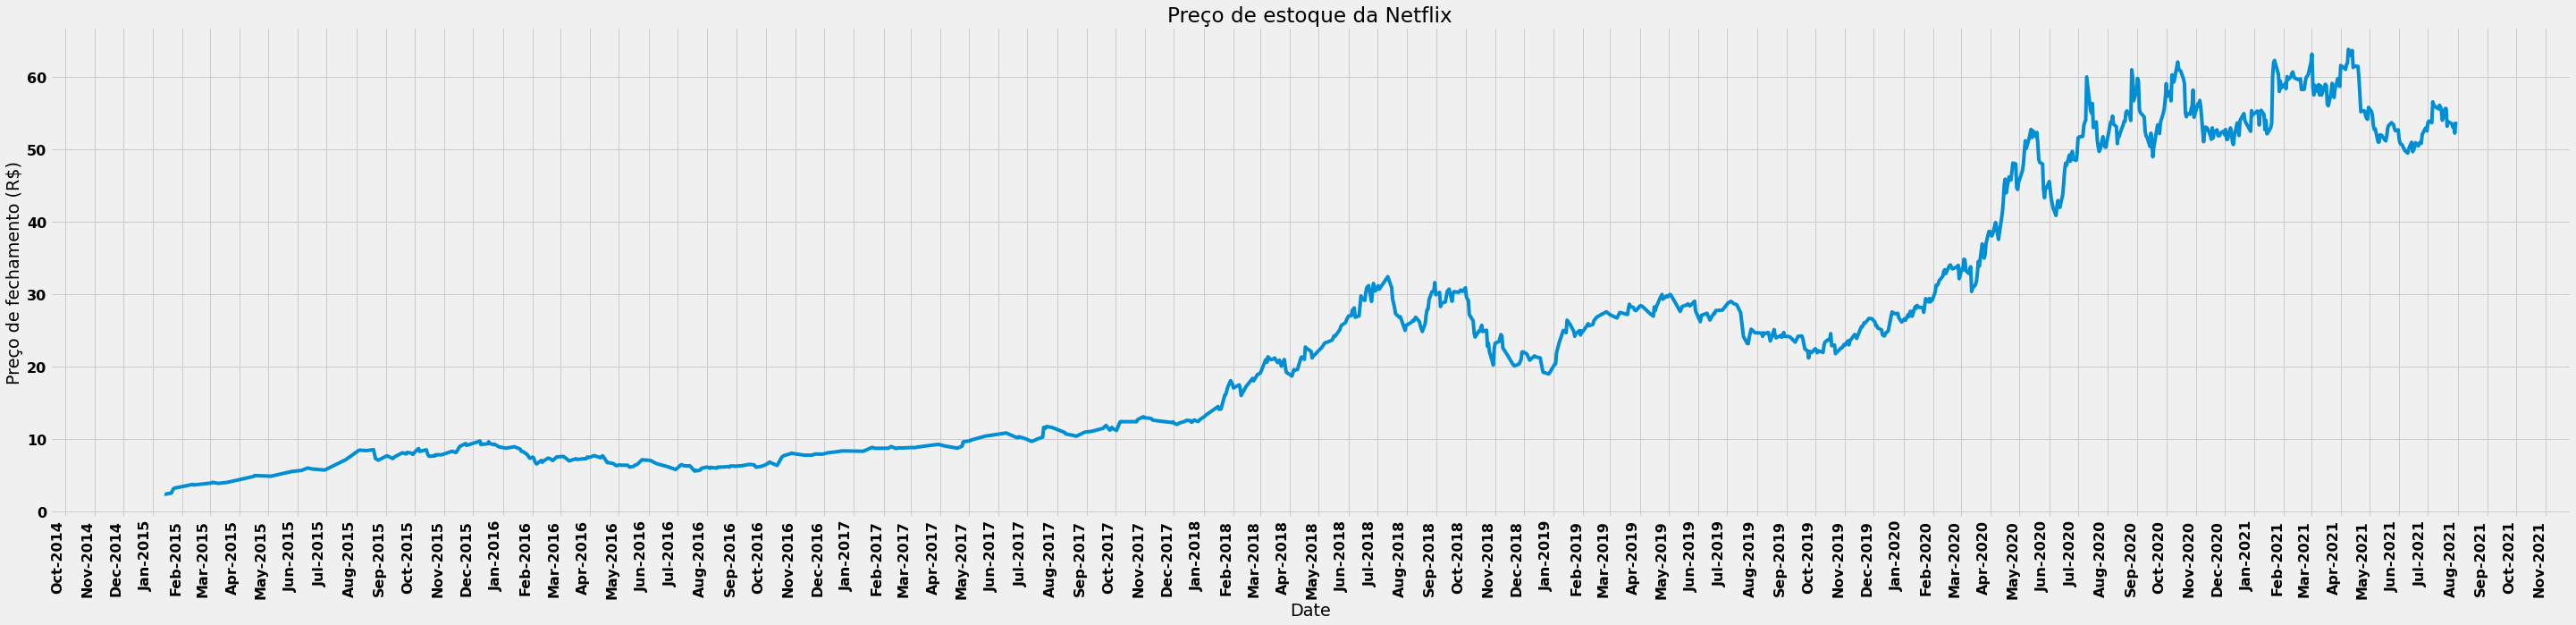

In [11]:
ax = df_stock['Close'].plot(title='Preço de estoque da Netflix')
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('\n%b-%Y'))
plt.xticks(rotation=90)
plt.tight_layout()

g = ax.set_ylabel('Preço de fechamento (R$)')

## Análise qualitativa



# 2. Retorno e Risco

Essencialmente, a natureza do Mercado Financeiro é baseada em um certo nível de retorno (a variação do seu investimento) para um dado nível de risco (o quão provável é esse retorno). Há uma série de maneiras para mensurar o risco, mas geralmente elas estão ligadas à volatilidade do ativo, que, em sua forma mais simples, é o desvio padrão dos preços em um dado período.

Com o mesmo ativo que você importou anteriormente, iremos iniciar os calculos de risco e retorno. Porém inicialmente iremos analisar retorno e risco com o preço de fechamento.

## Retorno

Existem algumas maneiras de se calcular o retorno de uma série temporal, aqui podemos citar duas:

- 2.1) Retorno Percentual: $R_t = \frac{P_t - P_{t-1}}{P_{t-1}} = \frac{P_t}{P_{t-1}} - 1$
- 2.2) Retorno Logaritmo: $r_t = \ln(\frac{P_t}{P{t-1}}) = \ln(P_t) - \ln(P_{t-1})$

Sendo $P_t$ o preço no tempo t, e $P_{t-1}$ preço no tempo $t-1$ (Dia anterior).

Manipulando o dataframe implemente esse dois tipos de retonos e compare-os. 

Calcule os retornos cumulativos ao longo do tempo:

- 2.3) Retorno Cumulativo Percentual: 

$R_{cum} = \prod_{t=0}^{t = \text{max dias}}{(1 + R_{t})} =  (1+R_{t-\text{max dias}}) * \dots * (1+R_{t-1}) * (1+R_t)$
- 2.4) Retorno Cumulativo Logaritmo: 

$r_{cum} = \sum_{t = 0}^{t = \text{max dias}}{(1 + r_t)} = (1+r_{t-\text{max dias}}) + \dots + (1+r_{t-1}) + (1+r_t)$

In [11]:
def cal_ret_pct(price_list: list):
    """
    Calcular retorno percetual e cumulativo percentutal
    
    @param: price_list(list) -> lista com os preços de fechamento
    @return: (list), (list) -> lista com retorno percentual, lista com o retorno percentual cumulativo
    """
    retorno_pct = []
    retorno_pct_cum = []
    
    for idx, valor in enumerate( price_list ):
        if idx == 0:
            retorno_pct.append( 0 )
            retorno_pct_cum.append( 1 )
            
        else:
            retorno_pct.append( ( price_list[idx] / price_list[idx-1] ) -1)
            retorno_pct_cum.append( ( retorno_pct[idx] + 1 ) * retorno_pct_cum[idx-1] )
            
    return retorno_pct, [i-1 for i in retorno_pct_cum]

In [12]:
def cal_ret_log(price_list: list):
    """
    Calcular retorno logaritimo e cumulativo logaritimo
    
    @param: price_list(list) -> lista com os preços de fechamento
    @return: (list), (list) -> lista com retorno logaritimo, lista com o retorno logaritimo cumulativo
    """
    retorno_log = []
    retorno_log_cum = []
    
    for idx, valor in enumerate( price_list ):
        if idx == 0:
            retorno_log.append( 0 )
            retorno_log_cum.append( 0 )
        else:
            retorno_log.append( np.log( price_list[idx] ) - np.log( price_list[idx-1] ) )
            retorno_log_cum.append( ( retorno_log[idx] ) + retorno_log_cum[idx-1] )
            
    return retorno_log, retorno_log_cum

In [13]:
df_stock['retorno_pct'], df_stock['retorno_pct_cum'] = cal_ret_pct(list(df_stock['Close']))
df_stock['retorno_log'], df_stock['retorno_log_cum'] = cal_ret_log(list(df_stock['Close']))

In [14]:
# Percentual:
#df_stock['retorno_pct'] = df_stock['Close'].pct_change() # https://pandas.pydata.org/docs/reference/api/pandas.Series.pct_change.html
#df_stock['retorno_pct_cum'] = (df_stock['retorno_pct'] + 1).cumprod()-1 # https://pandas.pydata.org/docs/reference/api/pandas.Series.cumprod.html#pandas.Series.cumprod

# Logaritmo:
#df_stock['retorno_log'] = np.log(df_stock['Close']/df_stock['Close'].shift(1)) # https://pandas.pydata.org/docs/reference/api/pandas.Series.shift.html
#df_stock['retorno_log_cum'] = df_stock['retorno_log'].cumsum() #https://pandas.pydata.org/docs/reference/api/pandas.Series.cumsum.html#pandas.Series.cumsum

In [15]:
df_stock.tail(10)

,Open,High,Low,Close,Volume,Currency,retorno_pct,retorno_pct_cum,retorno_log,retorno_log_cum
Date,,,,,,,,,,
2021-07-19,54.06,55.82,54.06,55.65,54710,BRL,0.029983,21.807377,0.029543,3.127084
2021-07-20,56.06,56.10,54.63,55.62,57110,BRL,-0.000539,21.795082,-0.000539,3.126545
2021-07-21,55.44,55.80,52.93,53.20,183187,BRL,-0.043510,20.803279,-0.044484,3.082060
2021-07-22,53.29,53.80,52.67,53.80,31367,BRL,0.011278,21.049180,0.011215,3.093275
2021-07-23,53.00,54.10,52.31,53.75,60815,BRL,-0.000929,21.028689,-0.000930,3.092346
2021-07-26,54.09,54.09,53.20,53.54,36530,BRL,-0.003907,20.942623,-0.003915,3.088431
2021-07-27,53.54,54.06,52.90,53.06,36064,BRL,-0.008965,20.745902,-0.009006,3.079425
2021-07-28,53.79,54.11,53.13,53.37,22644,BRL,0.005842,20.872951,0.005825,3.085251
2021-07-29,53.09,53.10,52.20,52.25,29896,BRL,-0.020986,20.413934,-0.021209,3.064042


In [16]:
# verificar

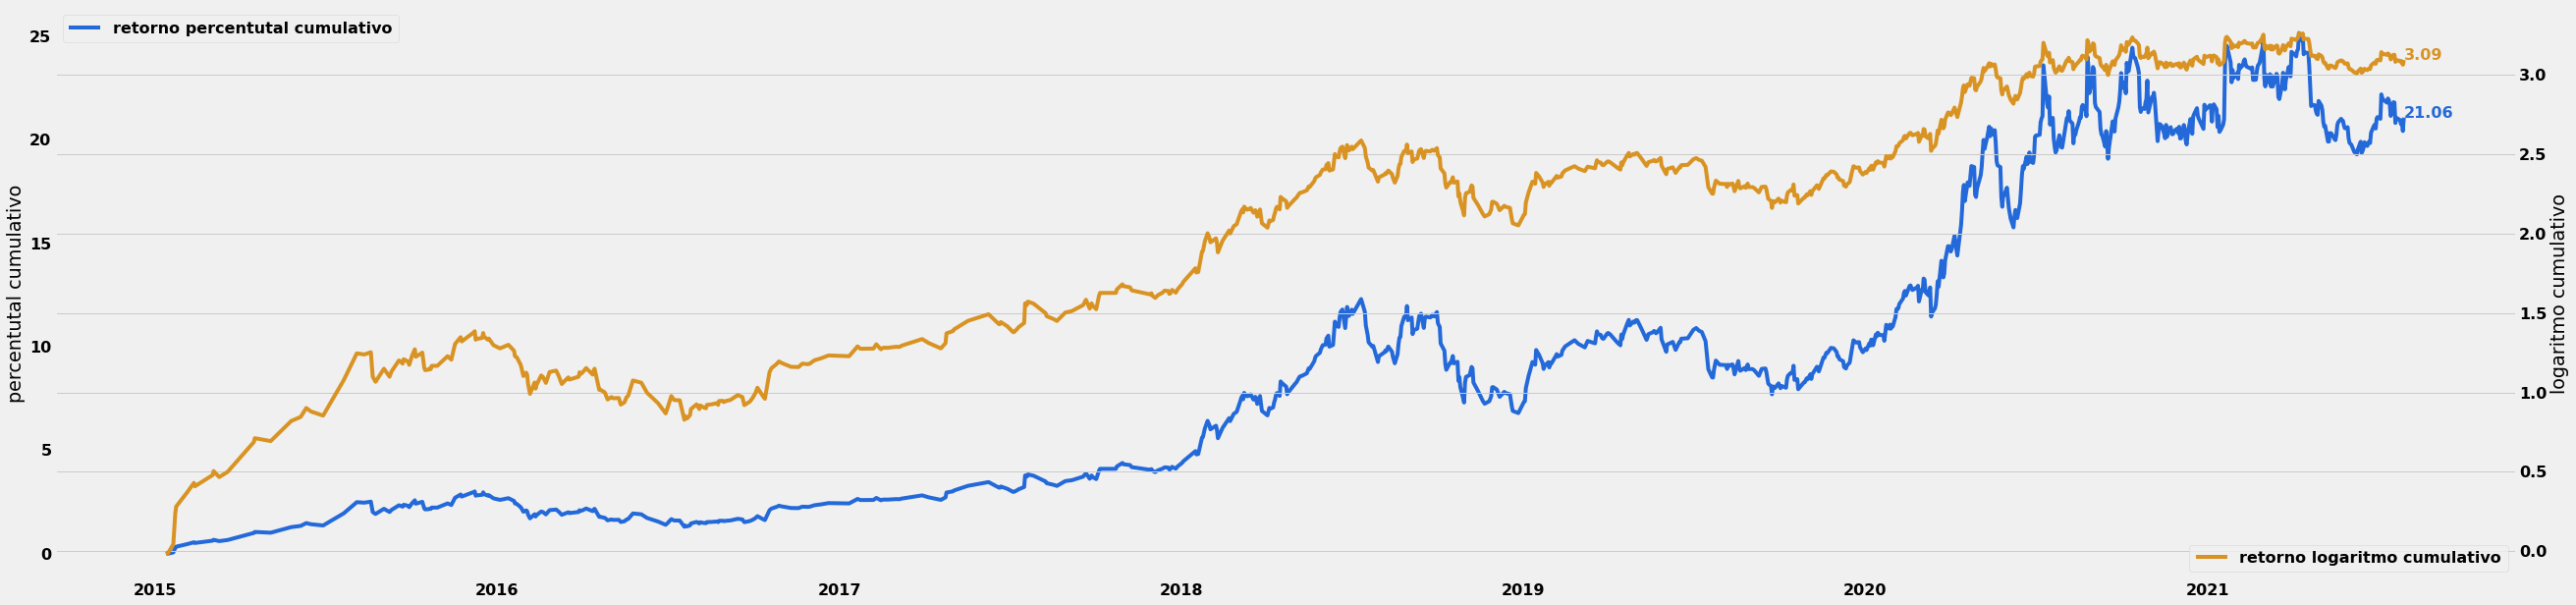

In [17]:
fig, ax = plt.subplots()

ax.plot(df_stock['retorno_pct_cum'], color='#2369d9', label='retorno percentutal cumulativo')
ax.set_ylabel('percentutal cumulativo')
ax.text(x=df_stock.index.max(), 
        y=df_stock['retorno_pct_cum'].iloc[-1], 
        s=round(df_stock['retorno_pct_cum'].iloc[-1], 2),
        color='#2369d9')

ax1 = ax.twinx()
ax1.plot(df_stock['retorno_log_cum'], color='#d99323', label='retorno logaritmo cumulativo')
ax1.set_ylabel('logaritmo cumulativo')
ax1.text(x=df_stock.index.max(), 
         y=df_stock['retorno_log_cum'].iloc[-1], 
         s=round(df_stock['retorno_log_cum'].iloc[-1], 2),
         color='#d99323')

g = ax.legend(loc='upper left')
g = ax1.legend(loc='lower right')
g = ax.grid()
#g = ax1.grid()

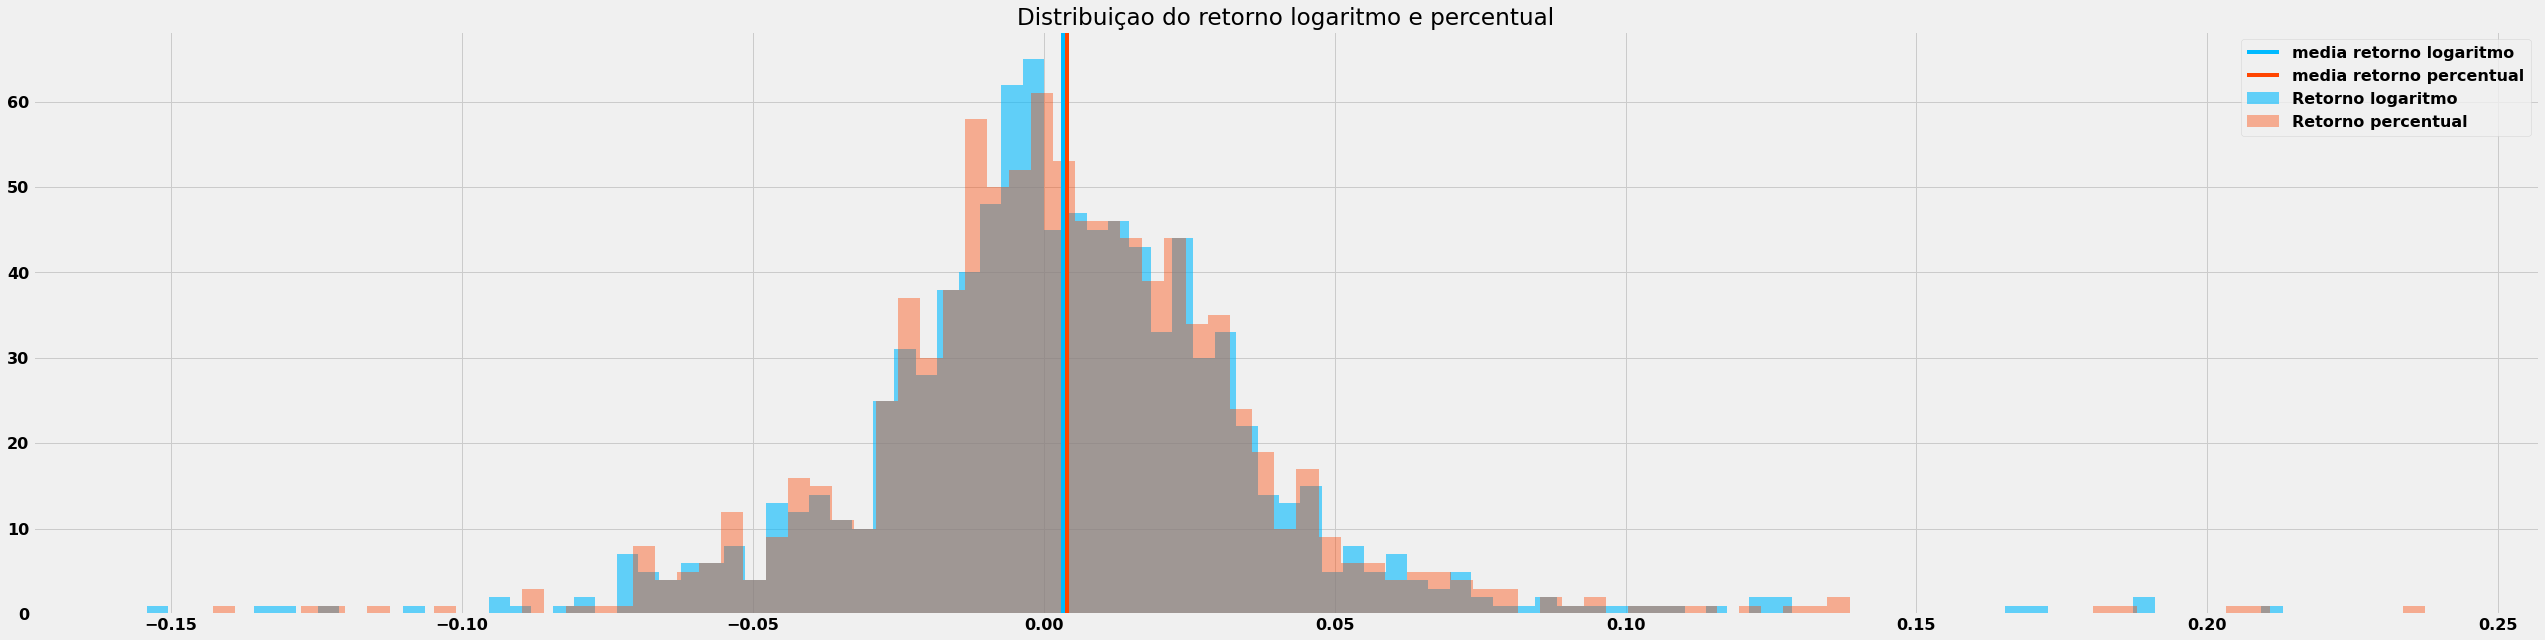

In [18]:
g = df_stock['retorno_log'].hist(bins=100, alpha=.6, label='Retorno logaritmo', color='#00baff')
p = df_stock['retorno_pct'].hist(bins=100, alpha=.4, color='#ff4500', ax=g, label='Retorno percentual')

p = g.axvline(df_stock['retorno_log'].mean(), color='#00baff', label='media retorno logaritmo')
p = g.axvline(df_stock['retorno_pct'].mean(), color='#ff4500', label='media retorno percentual')

p = g.legend()
p = g.set_title('Distribuiçao do retorno logaritmo e percentual')

In [19]:
# dfbkp = df_stock[:][:]

# dfbkp['retorno_pct'] = dfbkp['Close'].pct_change()
# dfbkp['retorno_pct_cum'] = (dfbkp['retorno_pct']  + 1).cumprod() -1

# dfbkp['retorno_log'] = np.log(dfbkp['Close'] / dfbkp['Close'].shift(1))
# dfbkp['retorno_log_cum'] = (dfbkp['retorno_log']).cumsum()

# fig, ax = plt.subplots()

# ax.plot(dfbkp['retorno_pct_cum'], color='#2369d9', label='retorno percentutal cumulativo')
# ax.set_ylabel('percentutal cumulativo')
# ax.text(x=dfbkp.index.max(), 
#         y=dfbkp['retorno_pct_cum'].iloc[-1], 
#         s=round(dfbkp['retorno_pct_cum'].iloc[-1], 2),
#         color='#2369d9')

# ax1 = ax.twinx()
# ax1.plot(dfbkp['retorno_log_cum'], color='#d99323', label='retorno logaritmo cumulativo')
# ax1.set_ylabel('logaritmo cumulativo')
# ax1.text(x=dfbkp.index.max(), 
#          y=dfbkp['retorno_log_cum'].iloc[-1], 
#          s=round(dfbkp['retorno_log_cum'].iloc[-1], 2),
#          color='#d99323')

# g = ax.legend(loc=1)
# g = ax1.legend(loc=2)
# g = ax.grid()
# g = ax1.grid()

comparacao ...

## Risco

Há diversos tipo de definições de risco, em finança quantitativas uma maneira bem fácil de calcular o risco é a partir da variação do ativo. Basicamente, você não quer investir num ativo que varia muito, ou seja, muito imprevisível. Uma maneira estátistica de cálcular essa volatilidade é a partir do desvio padrão.

- 2.5) Calcule o desvio padrão do ativo

Apenas o valor do desvio padrão não apresenta muita informação, então iremos calcular o rolling std. Básicamente iremos calcular o desvio padrão a cada t intervalo de tempo.

- 2.6) Calcule o rolling std

Dica: utilize o método ```pandas.rolling(window).std()``` do pandas, window é o intervalo em que você irá calcular o desvio padrão

- 2.7) Calcule o desvio padrão exponencial móvel (EWMA)

## Desafio

- 2.8) Calcule o desvio padrão estimado pelo High e Low ([Parkinson Number](https://www.ivolatility.com/help/3.html))
<img src="https://miro.medium.com/proxy/0*t4hSod9UQhA3Lsmz.png">

- 2.9) Calcule o desvio padrão estimado por High, Low, Close e Open ([Garman-Klass](https://portfolioslab.com/garman-klass))

<img src="https://miro.medium.com/max/1400/0*S6HDttTDL2p0GCC2.png">

Temos uma breve explicação desses estimadores de volatilidade em nosso Turing Talks: [Construindo uma Estratégia de Investimentos Quantitativa — Time Series Momentum](https://medium.com/turing-talks/construindo-uma-estrat%C3%A9gia-de-investimentos-quantitativa-time-series-momentum-7e60a40636bd)

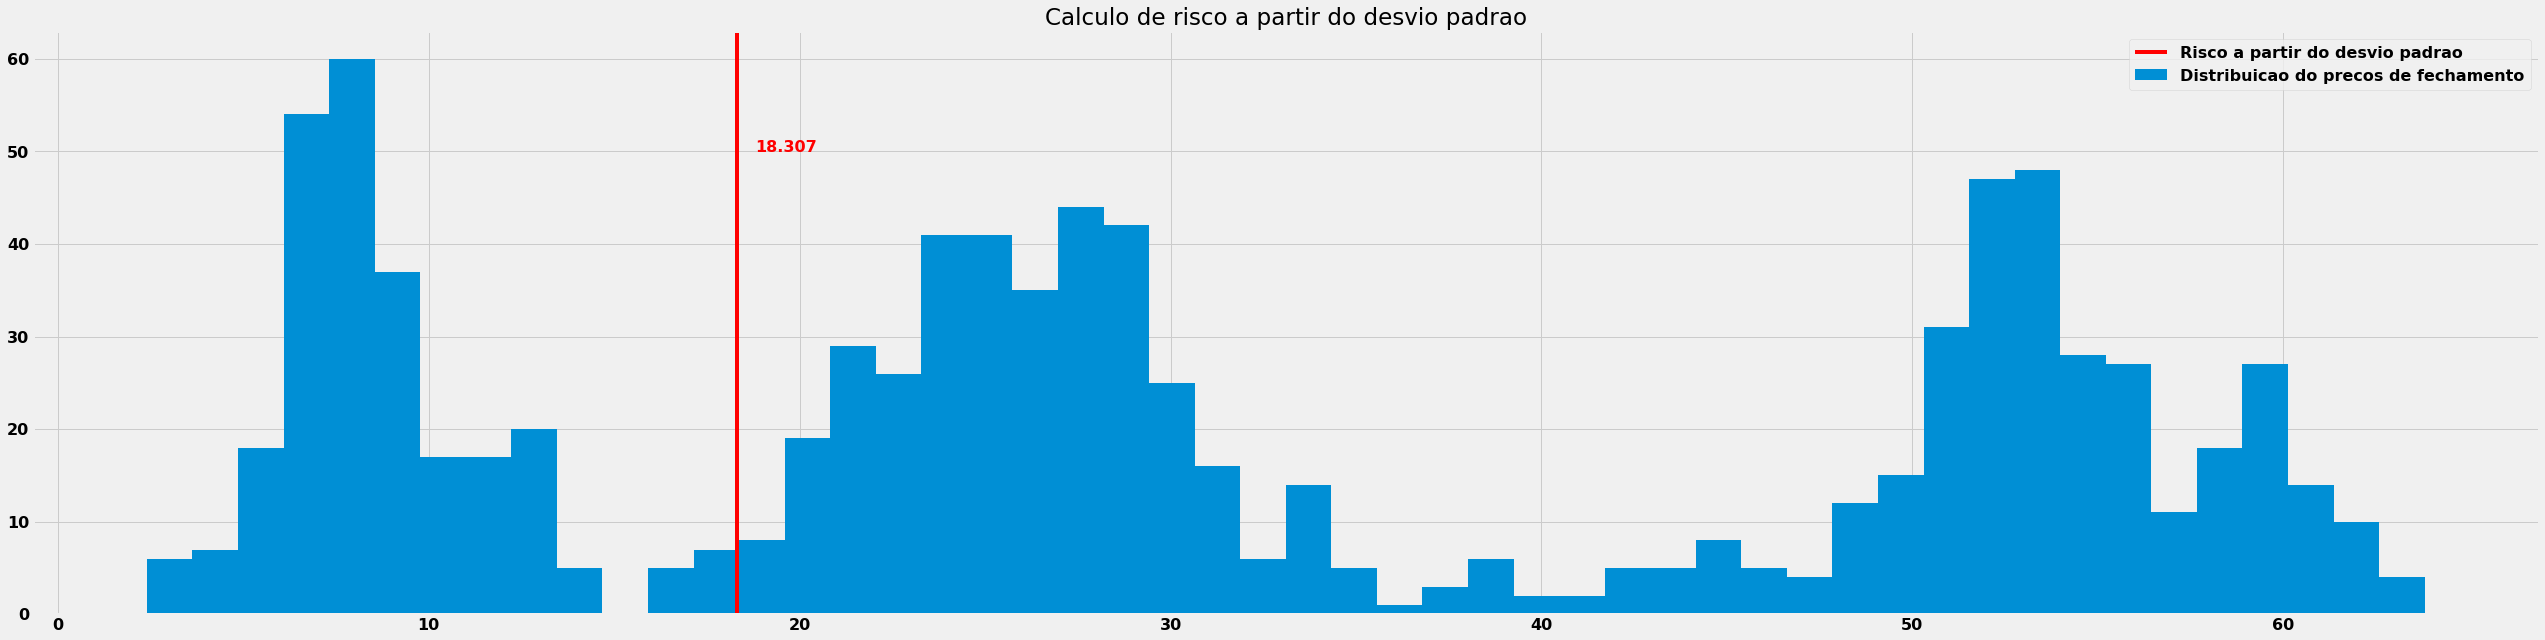

In [20]:
g = df_stock['Close'].hist(bins=50, label='Distribuicao do precos de fechamento')
p = g.axvline(df_stock['Close'].std(), c='r', label='Risco a partir do desvio padrao')
p = g.text(x = df_stock['Close'].std() + .5,
           y = 50,
           s = round(df_stock['Close'].std(), 3),
           color='r')

p = g.legend()
p = g.set_title('Calculo de risco a partir do desvio padrao')

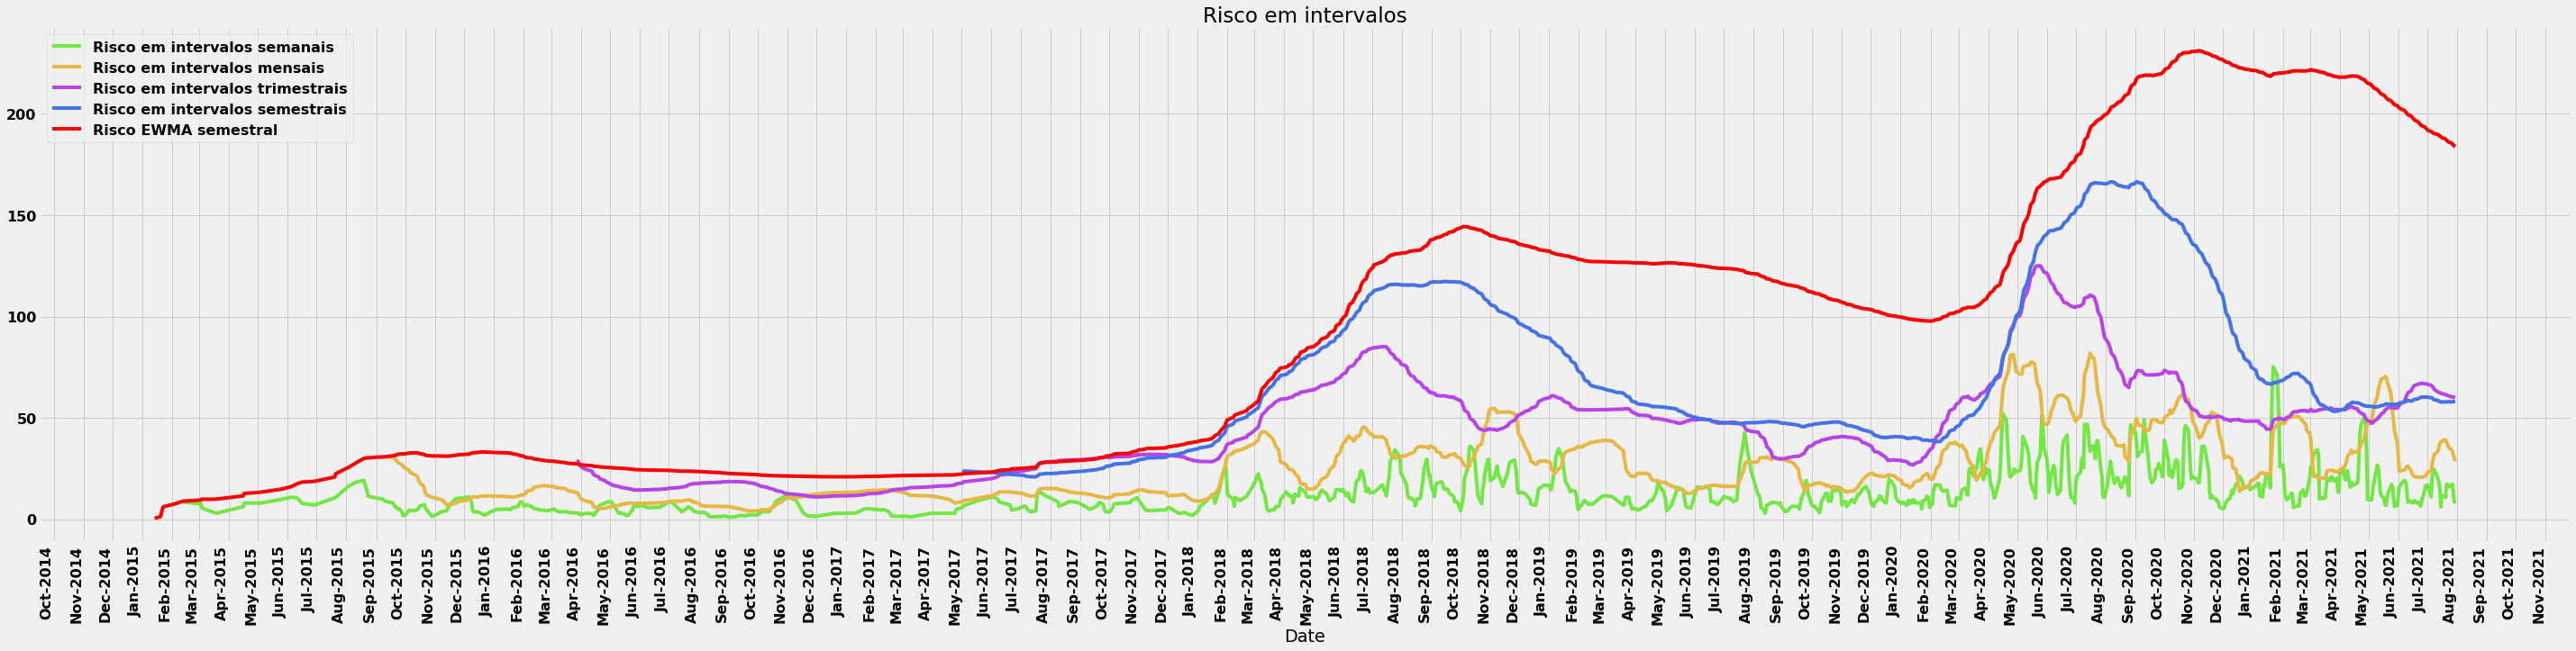

In [21]:
g = (df_stock.rolling(7)['Close'].std()*np.sqrt(252)).plot(label='Risco em intervalos semanais', color='#73e744')
p = (df_stock.rolling(30)['Close'].std()*np.sqrt(252)).plot(ax=g, label='Risco em intervalos mensais', color='#e7b844')
p = (df_stock.rolling(90)['Close'].std()*np.sqrt(252)).plot(ax=g, label='Risco em intervalos trimestrais', color='#b844e7')
p = (df_stock.rolling(180)['Close'].std()*np.sqrt(252)).plot(ax=g, label='Risco em intervalos semestrais', color='#4473e7')

p = (df_stock.ewm(180)['Close'].std()*np.sqrt(252)).plot(ax=g, label='Risco EWMA semestral', color='r')

p = g.xaxis.set_major_locator(mpl.dates.MonthLocator())
p = g.xaxis.set_major_formatter(mpl.dates.DateFormatter('\n%b-%Y'))
p = plt.xticks(rotation=90)
p = plt.tight_layout()

p = g.set_title('Risco em intervalos')
p = g.legend()
#p = g.grid()

In [22]:
def calc_parkinson_num(precos:pd.DataFrame, N:int=1, n:int=1):
    """
    Calculo da volatilidade de um ativo atraves do metodo de Parkinson
    
    @param precos(pd.DataFrame) -> Dataframe com as colunas High e Low
    @param N(int) -> fator de escala dos períodos
    @param n(int) -> tamanho da amostra
    """
    return np.sqrt((np.log(precos['High'] / precos['Low']) ** 2).rolling(n).sum() * (N / (4 * n * np.log(2))))

In [23]:
def calc_gk_num(precos:pd.DataFrame, N:int=1, n:int=1):
    """
    Calculo da volatilidade de um ativo atraves do metodo de Garman-Klass
    
    @param precos(pd.DataFrame) -> Dataframe com as colunas High,Low,Open e Close
    @param N(int) -> fator de escala dos períodos
    @param n(int) -> tamanho da amostra
    """
    return np.sqrt(N/n*(1 / 2 * np.log(df_stock['High'] / df_stock['Low']) ** 2 - (
                    2 * np.log(2) - 1) * np.log(df_stock['Close'] / df_stock['Open'])
                    ** 2).rolling(n).sum())

In [24]:
parkinson = calc_parkinson_num(df_stock[['High', 'Low']], N=1, n=90)

In [25]:
g_klass = calc_gk_num(df_stock[['High', 'Low', 'Open', 'Close']], N=1, n=90)

In [26]:
df_stock['valatilidade_gk'] = g_klass
df_stock['valatilidade_prk'] = parkinson

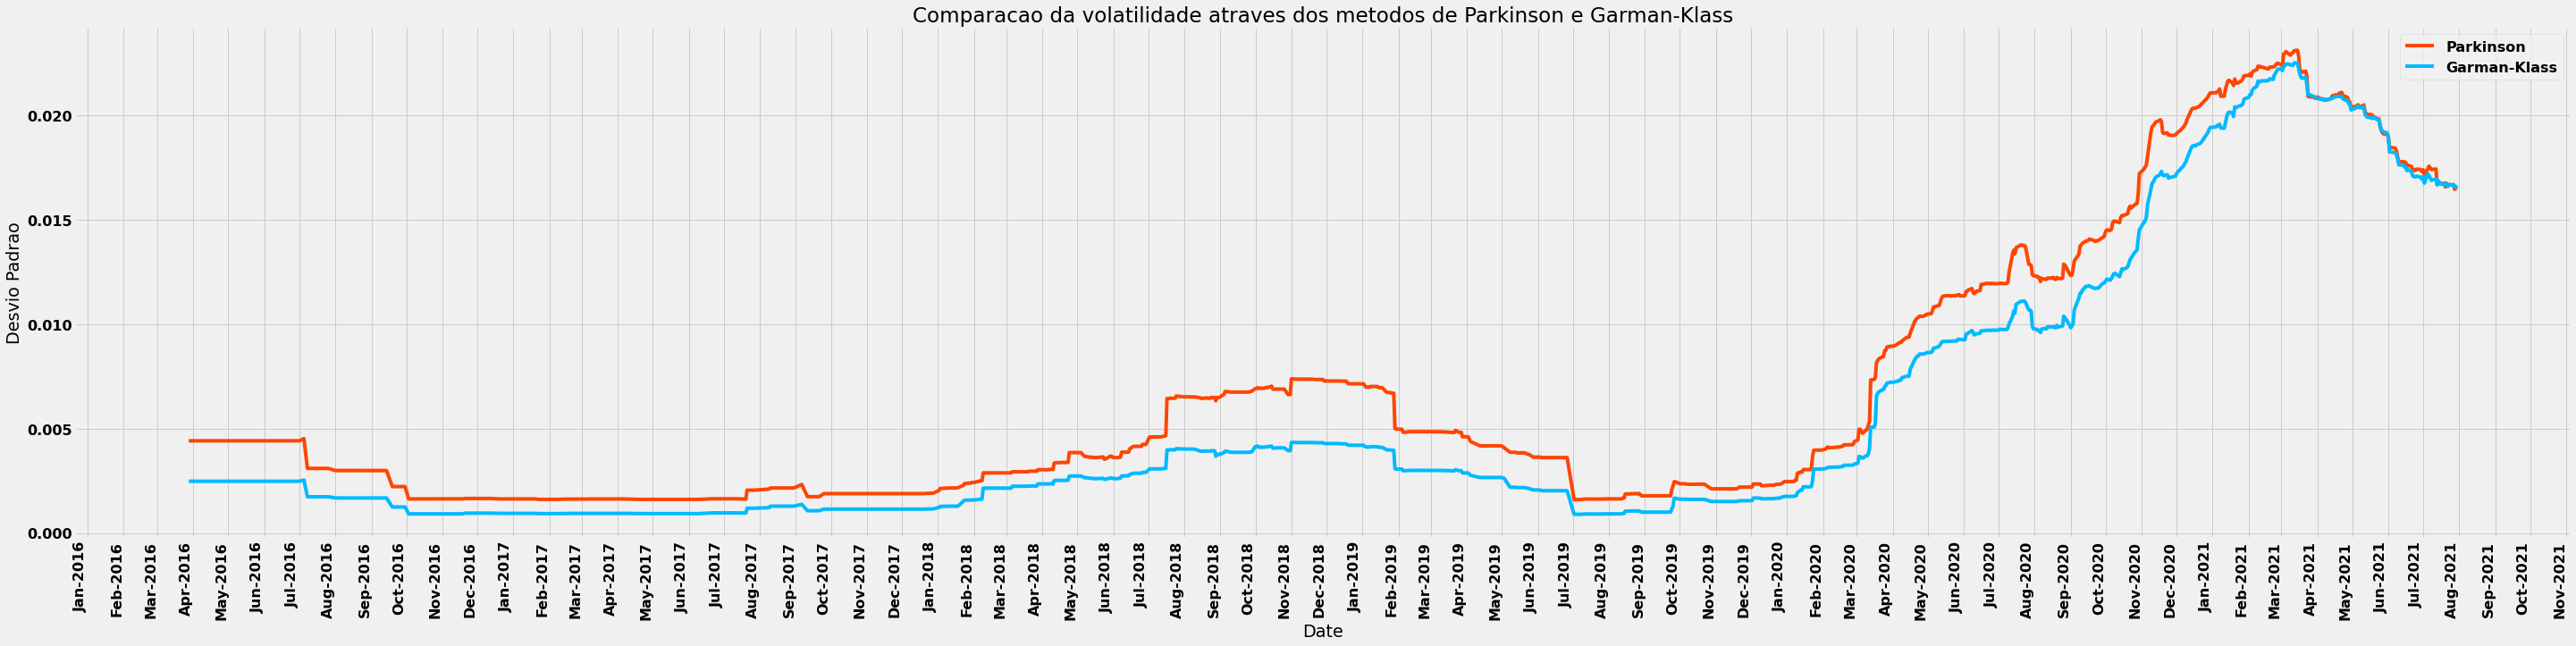

In [27]:
g = parkinson.plot(color='#ff4500', label='Parkinson')
p = g_klass.plot(ax=g, color='#00baff', label='Garman-Klass')

g.xaxis.set_major_locator(mpl.dates.MonthLocator())
g.xaxis.set_major_formatter(mpl.dates.DateFormatter('\n%b-%Y'))
plt.xticks(rotation=90)
plt.tight_layout()

p = g.legend()
p = g.set_ylabel('Desvio Padrao')
P = g.set_title('Comparacao da volatilidade atraves dos metodos de Parkinson e Garman-Klass')
#p = g.grid()

# 3. Lidando com portfolios
 
[Notebook de auxilio](https://github.com/quantopian/research_public/blob/master/notebooks/lectures/Introduction_to_NumPy/notebook.ipynb)

Agora que você já aprendeu como importar preços históricos e como calcular o risco e retorno de ativos, podemos usar esse conhecimento para começar a montar o nosso portfolio!

Nessa etapa, você irá montar uma carteira com 4 ações diferentes. 
 - Use o que você aprendeu nas etapas anteriores para construir um dataframe com 4 ativos diferentes junto com os seus respectivos **dados históricos de fechamento**.
 
Em seguida, você precisa distribuir a porcentagem que cada ativo da sua carteira receberá dos seus investimentos. Em finanças, chamamos isso de [pesos de um portfolio](https://www.investopedia.com/terms/p/portfolio-weight.asp)
 - Atribua pesos ($w$) para cada um dos ativos que estão na sua carteira (Ele devem somar 1) . Ex: w = [0.3, 0.3, 0.2, 0.2]

## Retorno

Agora, você pode calcular o **retorno** do seu portfolio. 

O retorno para um período é dado pela seguinte fórmula: $R = \vec{r} \times \vec{w}$

Onde $\vec{r}$ é o vetor de retornos de cada ativo da carteira, e $\vec{w}$ os seus respectivos pesos.

- 3.1) Calcule o **retorno** para cada dia da série temporal

- 3.2) Faça um gráfico para visualizar os **retornos cumulativos** do seu portfolio e compare com algum benchmark (EX: IBOV). 

In [28]:
#investpy.get_stocks_dict(country='brazil')

In [29]:
atvs = ['NFLX34', 'EMBR3', 'MGLU3', 'ITUB4']

# lista de pesos aleatorios
pesos = np.random.uniform(0, 1, len(atvs))

# normaliza para soma dar 1
soma = pesos.sum()
pesos = [p / soma for p in pesos]

In [30]:
atv_peso = dict(zip(atvs, pesos))
atv_peso

{'NFLX34': 0.20408115564882892,
 'EMBR3': 0.2664107050216585,
 'MGLU3': 0.24402501696934167,
 'ITUB4': 0.285483122360171}

In [31]:
df_portfolio = pd.DataFrame()

for atv in atvs:
    df_portfolio[atv] = investpy.get_stock_historical_data(stock=atv,
                                                           country='brazil',
                                                           from_date='01/01/2018',
                                                           to_date='01/08/2021')['Close']

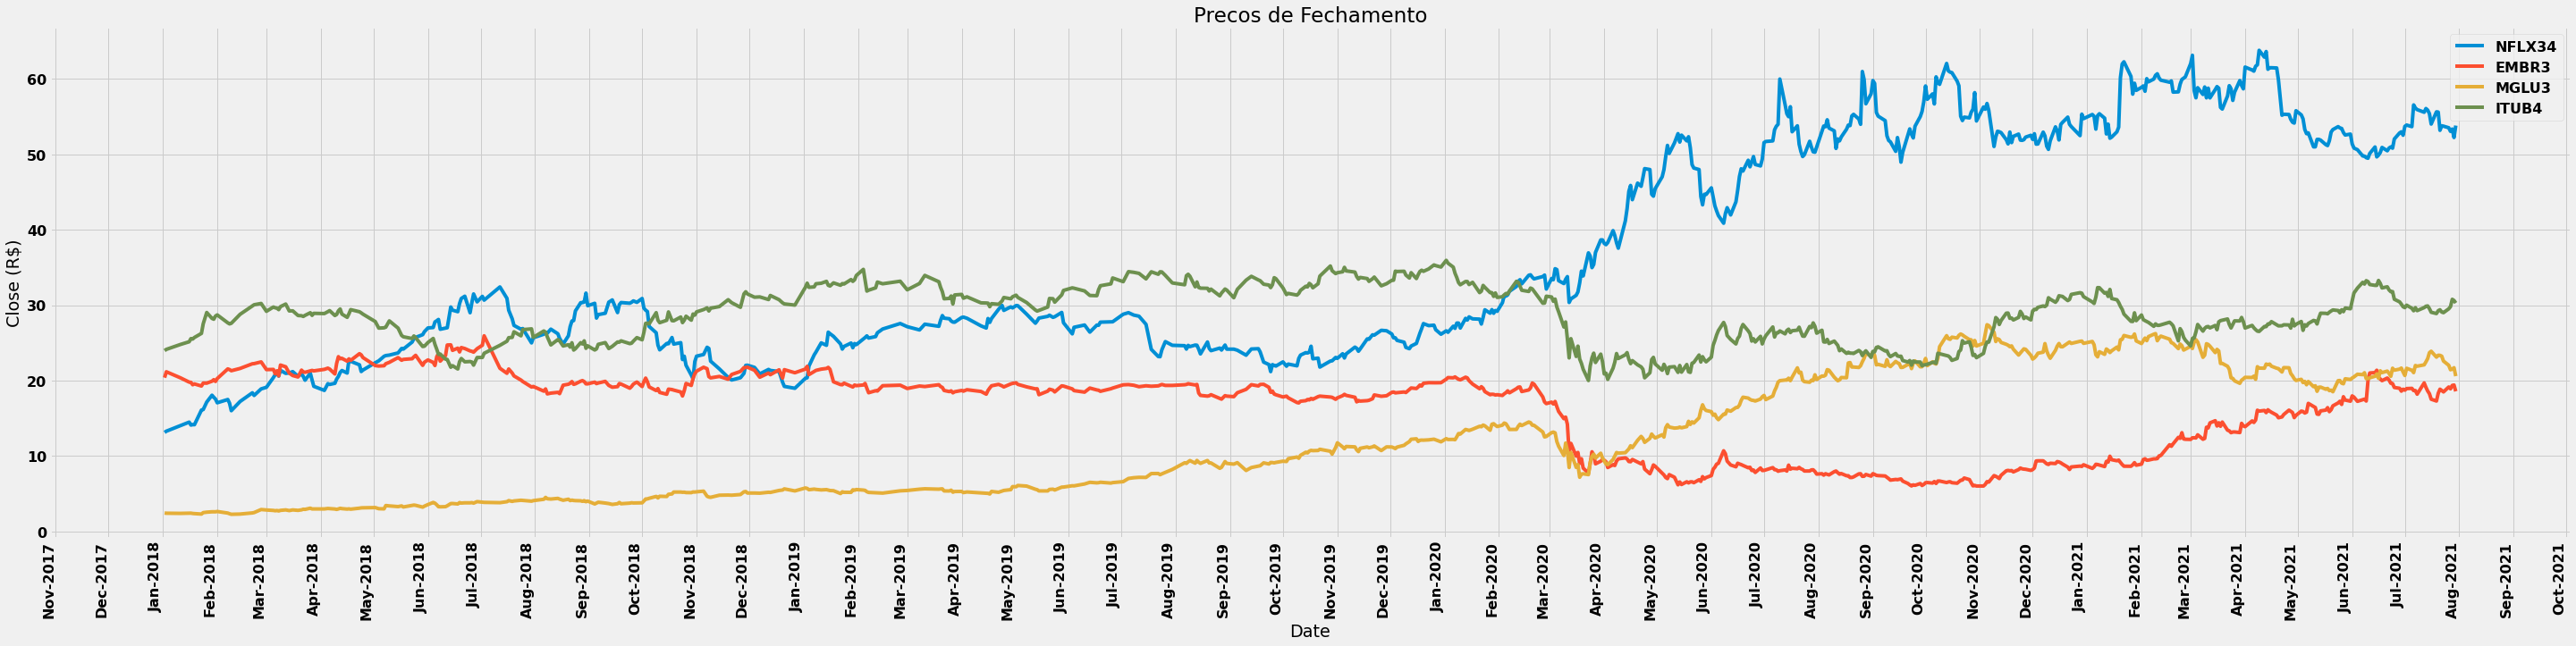

In [32]:
g = df_portfolio[atvs].plot(subplots=False)

g.xaxis.set_major_locator(mpl.dates.MonthLocator())
g.xaxis.set_major_formatter(mpl.dates.DateFormatter('\n%b-%Y'))
plt.xticks(rotation=90)
plt.tight_layout()

p = g.set_title('Precos de Fechamento')
p = g.set_ylabel('Close (R$)')
#p = g.grid()

In [33]:
retorno = np.dot(df_portfolio[atvs].pct_change(), pesos)
df_portfolio['retorno_simples'] = retorno
df_portfolio['retorno_simples_cum'] = (df_portfolio['retorno_simples'] + 1).cumprod() -1

In [34]:
df_portfolio.tail(10)

,NFLX34,EMBR3,MGLU3,ITUB4,retorno_simples,retorno_simples_cum
Date,,,,,,
2021-07-19,55.65,17.30,23.12,28.90,-0.007160,1.911418
2021-07-20,55.62,18.32,23.37,29.28,0.021990,1.975440
2021-07-21,53.20,18.87,23.36,29.40,0.000184,1.975988
2021-07-22,53.80,18.70,23.25,29.10,-0.004161,1.963606
2021-07-23,53.75,18.51,22.60,29.02,-0.010504,1.932478
2021-07-26,53.54,19.16,22.04,29.53,0.007528,1.954555
2021-07-27,53.06,18.92,21.45,29.82,-0.008896,1.928272
2021-07-28,53.37,19.37,21.53,30.79,0.017725,1.980176
2021-07-29,52.25,19.42,21.72,30.63,-0.002925,1.971459


In [35]:
benchmark = investpy.indices.get_index_historical_data(index='Bovespa', 
                                                       country='brazil', 
                                                       from_date='01/01/2018', 
                                                       to_date='01/08/2021')['Close']

benchmark = benchmark.pct_change()
benchmark = (benchmark + 1).cumprod() -1
benchmark.tail(10)

Date
2021-07-19    0.597039
2021-07-20    0.609955
2021-07-21    0.616734
2021-07-22    0.619532
2021-07-23    0.605487
2021-07-26    0.617697
2021-07-27    0.599825
2021-07-28    0.621317
2021-07-29    0.613473
2021-07-30    0.563737
Name: Close, dtype: float64

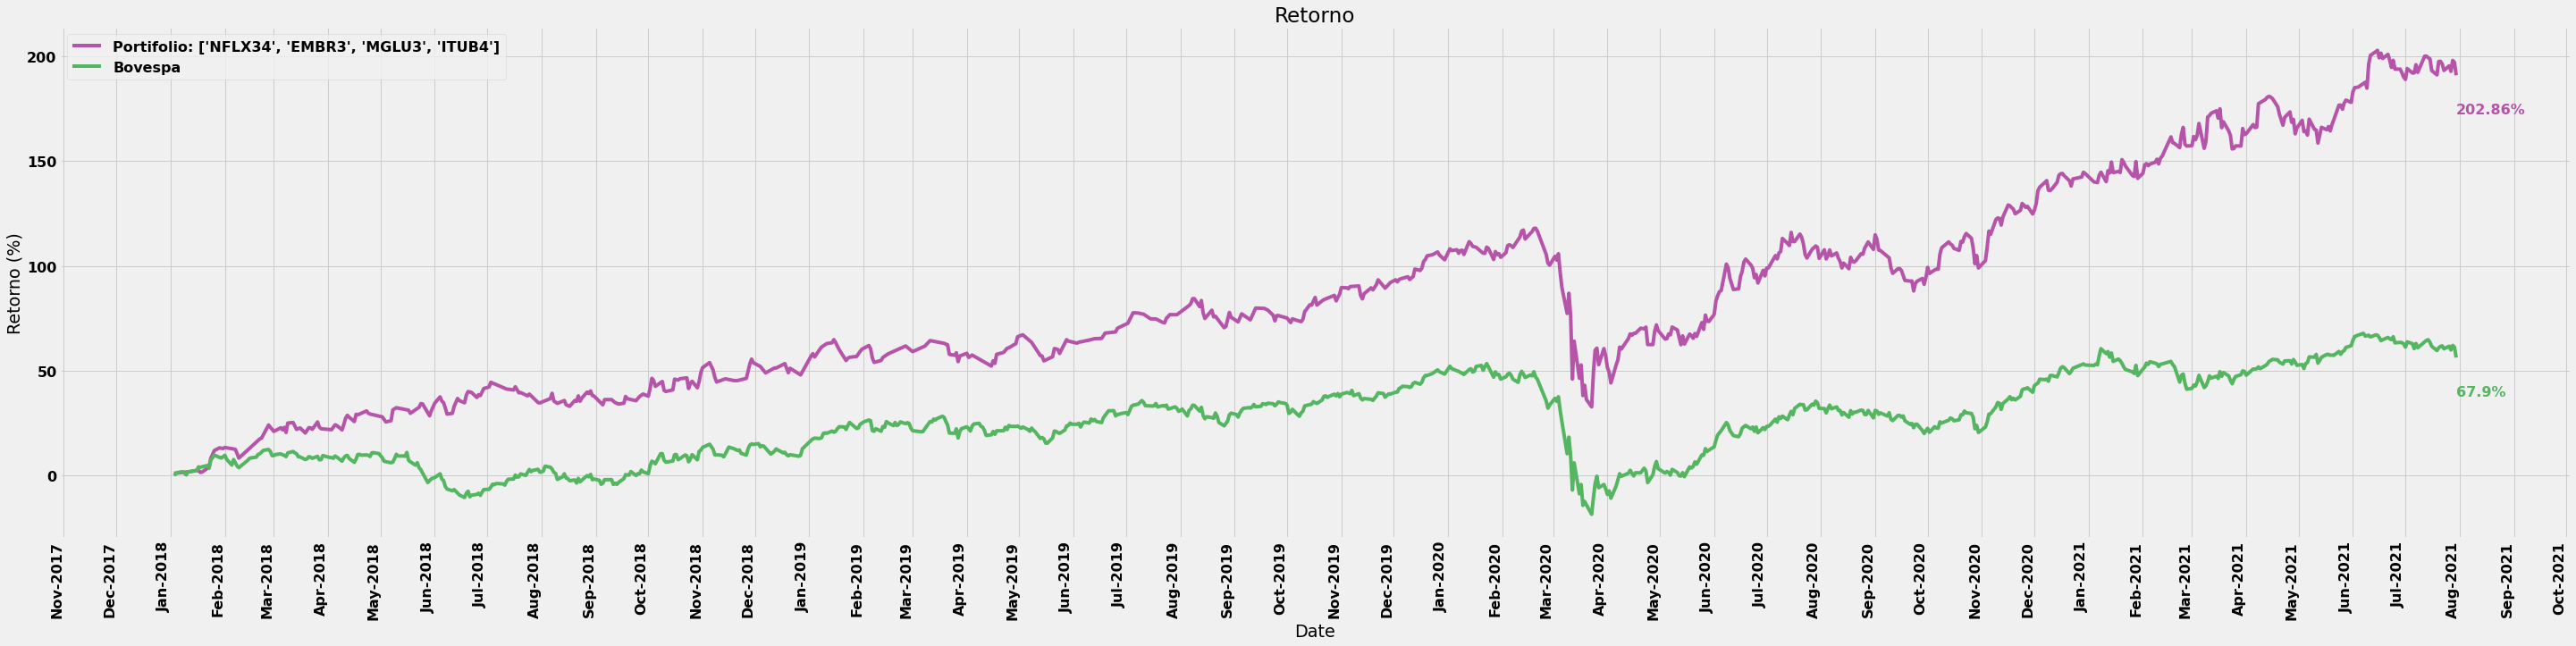

In [36]:
g = (df_portfolio['retorno_simples_cum']*100).plot(label='Portifolio: '+str(atvs), color='#b654aa')
p = (benchmark * 100).plot(label= 'Bovespa', color='#54b660')

p = g.text(x=df_portfolio.index.max(), 
           y=df_portfolio['retorno_simples_cum'].max()*100-30, 
           s=str(round(df_portfolio['retorno_simples_cum'].max()*100, 2))+'%', color='#b654aa')

p = g.text(x=benchmark.index.max(), 
           y=benchmark.max()*100-30, 
           s=str(round(benchmark.max()*100, 2))+'%', color='#54b660')

g.xaxis.set_major_locator(mpl.dates.MonthLocator())
g.xaxis.set_major_formatter(mpl.dates.DateFormatter('\n%b-%Y'))
plt.xticks(rotation=90)
plt.tight_layout()

p = g.set_title('Retorno')
p = g.set_ylabel('Retorno (%)')
p = g.legend()
#p = g.grid()

## Risco

Para calcular um **risco** de um portfolio precisamos levar em conta as correlações entre todos os ativos. Para isso calcularemos a matriz de covariaças $C$ (```pandas.cov()``` ou ```np.cov()```).

A equação do risco de uma portfólio é dada pela seguinte fórmula: $\sigma = \sqrt{\vec{w}C\vec{w}^\mathsf{T}}$, sendo $T$ a tranposição de um array 

- 3.3) Calcule o risco de 3 portfólios (varie o vetor de pesos).

In [37]:
# ajustar pra anual

In [38]:
log_ret = np.log(df_portfolio[atvs]/df_portfolio[atvs].shift(1))
vol = np.sqrt(np.dot(np.array(pesos).T, np.dot(log_ret.cov()*63, pesos)))
vol = round(vol*100, 2)

print(f'Com os pesos: {atv_peso} a valatilidade é de {vol}%')

Com os pesos: {'NFLX34': 0.20408115564882892, 'EMBR3': 0.2664107050216585, 'MGLU3': 0.24402501696934167, 'ITUB4': 0.285483122360171} a valatilidade é de 16.64%


In [39]:
pesos_ = np.random.uniform(0, 1, len(atvs))

# normaliza para soma dar 1
soma = pesos_.sum()
pesos_ = [p / soma for p in pesos_]

atv_peso_ = dict(zip(atvs, pesos_))
atv_peso_

log_ret = np.log(df_portfolio[atvs]/df_portfolio[atvs].shift(1))
vol = np.sqrt(np.dot(np.array(pesos_).T, np.dot(log_ret.cov()*63, pesos_)))
vol = round(vol*100, 2)

print(f'com os pesos: {atv_peso_} a valatilidade é de {vol}%')

com os pesos: {'NFLX34': 0.4251269661698679, 'EMBR3': 0.45381663618644996, 'MGLU3': 0.06178725954130273, 'ITUB4': 0.05926913810237932} a valatilidade é de 17.4%


In [40]:
pesos_ = np.random.uniform(0, 1, len(atvs))

# normaliza para soma dar 1
soma = pesos_.sum()
pesos_ = [p / soma for p in pesos_]

atv_peso_ = dict(zip(atvs, pesos_))
atv_peso_

log_ret = np.log(df_portfolio[atvs]/df_portfolio[atvs].shift(1))
vol = np.sqrt(np.dot(np.array(pesos_).T, np.dot(log_ret.cov()*63, pesos_)))
vol = round(vol*100, 2)

print(f'com os pesos: {atv_peso_} a valatilidade é de {vol}%')

com os pesos: {'NFLX34': 0.04285873880865046, 'EMBR3': 0.14882469543457158, 'MGLU3': 0.277830584670266, 'ITUB4': 0.5304859810865119} a valatilidade é de 18.09%


In [41]:
pesos_ = [.25, .25, .25, .25]

atv_peso_ = dict(zip(atvs, pesos_))
atv_peso_

log_ret = np.log(df_portfolio[atvs]/df_portfolio[atvs].shift(1))
vol = np.sqrt(np.dot(np.array(pesos_).T, np.dot(log_ret.cov()*63, pesos_)))
vol = round(vol*100, 2)

print(f'com os pesos: {atv_peso_} a valatilidade é de {vol}%')

com os pesos: {'NFLX34': 0.25, 'EMBR3': 0.25, 'MGLU3': 0.25, 'ITUB4': 0.25} a valatilidade é de 16.27%


## Teoria Moderna de Portifolio - Markowitz 

Markowitz também conhecido como efficient frontier, é uma maneira de otimizar uma carteira de investimentos. A maneira mais simples de encontrar a melhor solução é via simulação. Portanto simula-se diversos pesos, e para cada peso é calculado seu retorno esperado e risco. 

- 3.4) Otimize a carteira e obtenha o portfolio com o melhor retorno ajustado ao risco (Sharpe Ratio)

<img src="https://miro.medium.com/max/864/1*RQrjkJQhgVLnpyo1lXbizA.png">

In [42]:
def calc_markowitz(df:pd.DataFrame, simulacoes=100000):
    """
    nao esuqecer documentar
    """
    peso, risco, retorno, sharpe = [], [], [], []
    
    ret = df.pct_change()
    ret = ret.mean() * 252
        
    for s in range(simulacoes):
        # pesos
        pesos = np.random.uniform(0, 10, len(atvs))
        soma = pesos.sum()
        pesos = [p / soma for p in pesos]

        #retorno
        ret_peso = np.dot(ret, pesos)

        # risco
        log_ret = np.log(df/df.shift(1))
        vol = np.sqrt(np.dot(np.array(pesos).T, np.dot(log_ret.cov(), pesos))) * np.sqrt(252)
        
        # shape
        shapeR = (ret_peso - 0)/vol
        
        peso.append(pesos)
        risco.append(vol)
        retorno.append(ret_peso)
        sharpe.append(shapeR)
        
    data = {'pesos':peso,
            'risco':risco,
            'retorno':retorno,
            'sharpe_ratio':sharpe}
    
    return pd.DataFrame(data)

In [43]:
portf_mark = calc_markowitz(df_portfolio[atvs])

In [44]:
print('Melhor distribuição dos pesos: ')

dict(
     zip(
         atvs,
         portf_mark[portf_mark['sharpe_ratio'] == portf_mark['sharpe_ratio'].max()]['pesos'].iloc[0]
     )
)

Melhor distribuição dos pesos: 


{'NFLX34': 0.509335122596511,
 'EMBR3': 0.0002053893682867538,
 'MGLU3': 0.48941451571114153,
 'ITUB4': 0.0010449723240606602}

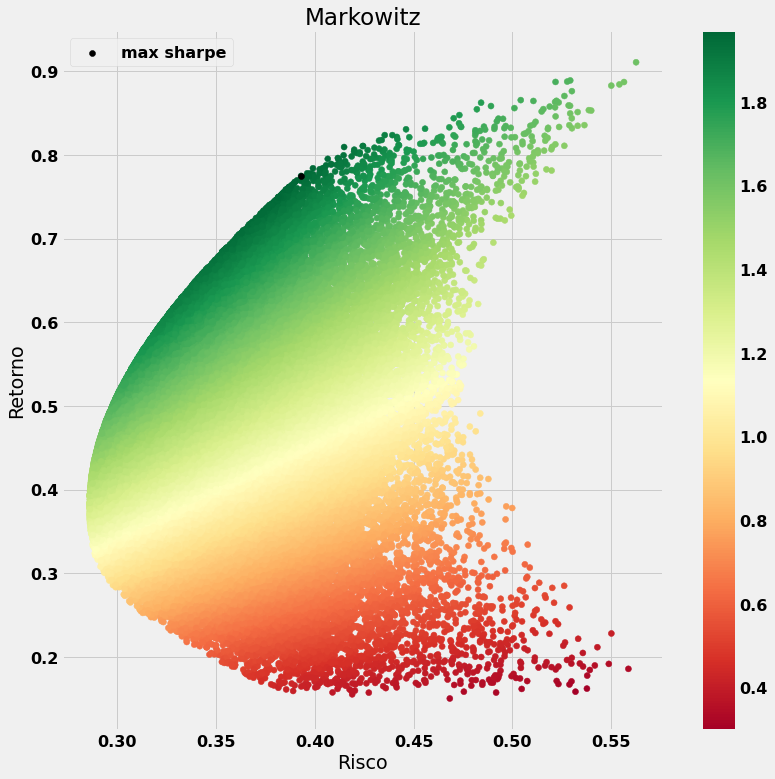

In [45]:
plt.figure(figsize=(12, 12))
#p = plt.grid()

g = \
plt.scatter(x=portf_mark['risco'],
            y=portf_mark['retorno'],
            c=portf_mark['sharpe_ratio'],
            cmap='RdYlGn')

plt.scatter(x=portf_mark[portf_mark['sharpe_ratio'] == portf_mark['sharpe_ratio'].max()]['risco'].iloc[0],
            y=portf_mark[portf_mark['sharpe_ratio'] == portf_mark['sharpe_ratio'].max()]['retorno'].iloc[0],
            color='#000000', label='max sharpe')

p = plt.colorbar(g)

p = plt.ylabel('Retorno')
p = plt.xlabel('Risco')
p = plt.title('Markowitz')
p = plt.legend()

## Backtesting

Estratégia de investimento: Rebalanceamento mensal de uma carteira de investimentos.

- 3.5.1) Maneira simplificada: Calcular retornos mensais ao longo do tempo. Obtenha os pesos otimizado para o mês e calcule o rendimento do proxímo mês.
- 3.5.2) Maneira completa: Realize o rebalanceamento mensal e calcule os retornos diários. Fique atento que ao longo do mês os pesos do ativos variam.
- 3.6) Faça uma análise quantitativa e qualitativa da performace do backtesting.

In [46]:
def backtesting_simples(dados:pd.DataFrame):
    """
    """
    dados.std()

# 4. Previsão de Time Series

## Cross validation em Séries Temporais

Sempre que lidamos com algoritmos de machine learning, para treiná-los temos que separar os datasets em treino e em teste. Em séries temporais não podemos separar os dados aleatoriamente, pois a ordem no tempo importa! Portanto, seguimos a seguinte separação ao longo do tempo:

<img src="https://habrastorage.org/files/f5c/7cd/b39/f5c7cdb39ccd4ba68378ca232d20d864.png"/>

## Feature Engineering em Série Temporal

Para inserir machine learning em séries temporais, precisamos efetuar o processo conhecido como feature engineering, que é básicamente construir as entradas de nosso modelo.

### Lags
Os dados mais simples que podemos inserir no nosso modelo são os valores passados.
Se deslocarmos (com a função `.shift(i)`) a série temporal em $i$ vezes, conseguimos estabelecer uma feature onde o valor atual no tempo $t$ é alinhado com um valor no tempo $t-i$. Chamamos isso de _lag_, ou atraso na série temporal. Isso é bastante útil, por exemplo, para estratégias baseadas em um valor histórico de uma feature.

### Demais features
Além dos pontos passados outras features podem ser inseridas no modelo: Volume de negociações, momentum, volatilidade, dados do mercado (ex: ibov) e etc.

- 4.1) Realize o feature engineering e teste alguns modelos de ML (Ex: Regressão linear, ARIMA, Decision Tree, Random Forest, Redes Neurais, etc...)
- 4.2) Faça um gráfico comparando os valores reais e preditos pelo modelo, durante um determinado período.
<br/>
Exemplo:
<br/>
<img width="500" height="500" src="https://miro.medium.com/max/1000/1*NvhZBDp5jNX-5Qd4LT7FEw.png">

In [156]:
# Modelos
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import Normalizer

In [174]:
df_pred = df_stock[['Close', 'Volume']][:][:] # Cria uma copia do dataframe stock com as colunas de interesse
df_pred

,Close,Volume
Date,,
2015-01-13,2.44,35000
2015-01-14,2.40,35000
2015-01-20,2.55,140000
2015-01-22,3.08,175000
2015-01-23,3.23,35000
...,...,...
2021-07-26,53.54,36530
2021-07-27,53.06,36064
2021-07-28,53.37,22644


<AxesSubplot:>

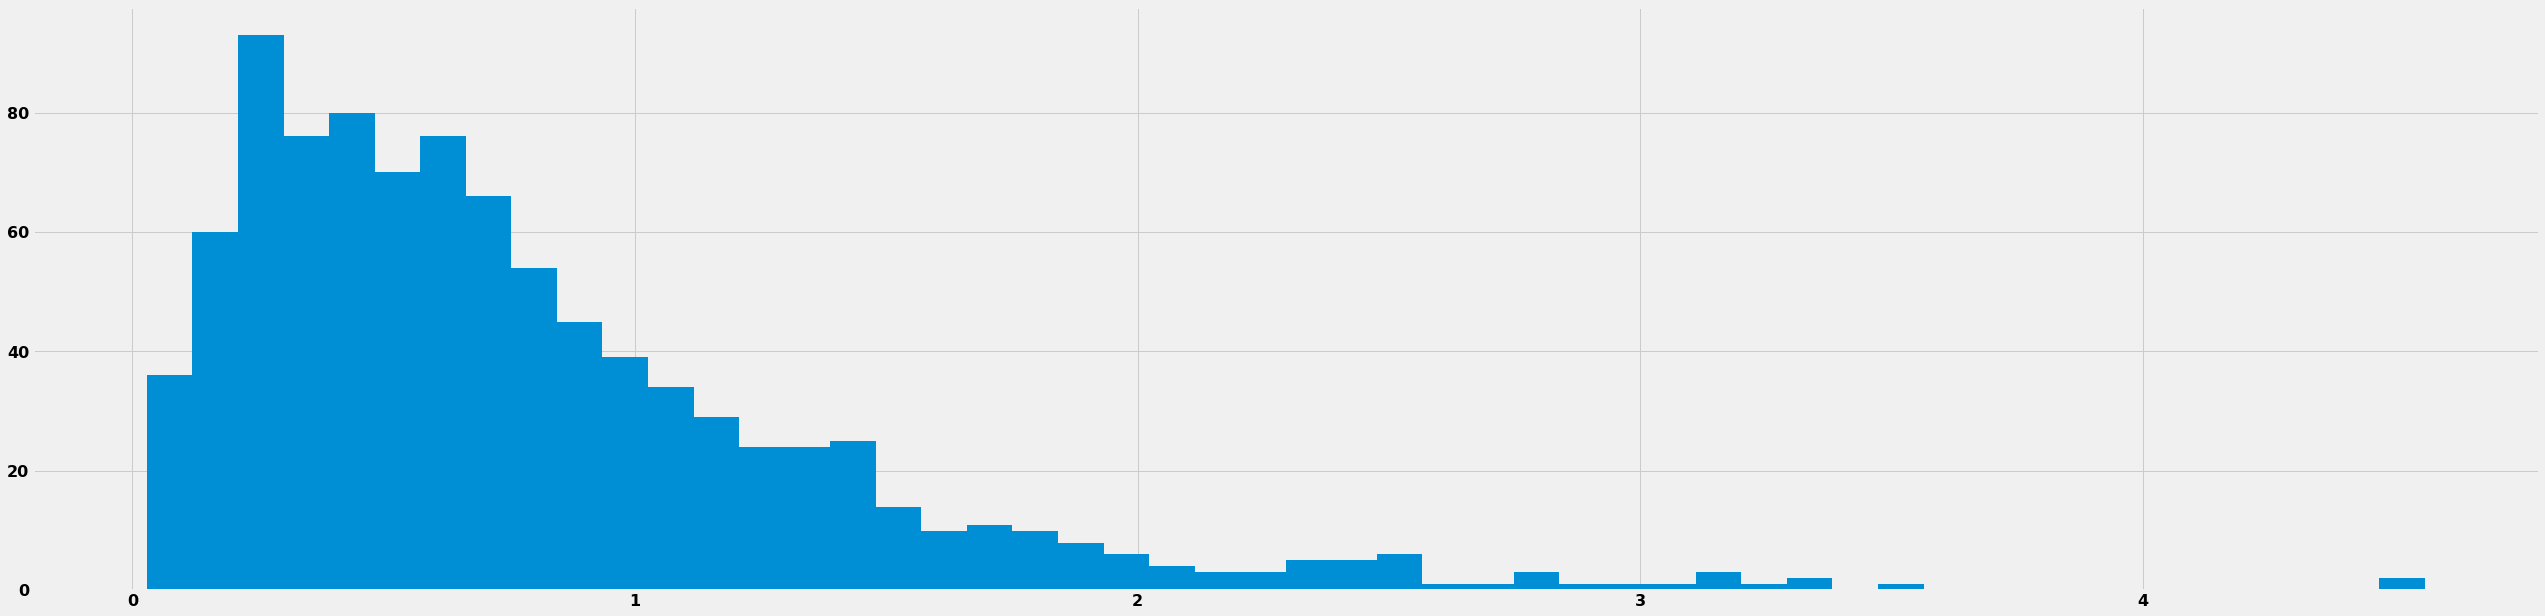

In [175]:
# Adicona o valor do risco com uma janela semanal
df_pred['Volatilidade'] = df_pred['Close'].rolling(5).std()
df_pred['Volatilidade'].hist(bins=50)

In [176]:
df_pred['Volatilidade'].head(20)

Date
2015-01-13         NaN
2015-01-14         NaN
2015-01-20         NaN
2015-01-22         NaN
2015-01-23    0.386458
2015-02-04    0.475763
2015-02-11    0.461357
2015-02-12    0.287976
2015-03-03    0.264632
2015-03-04    0.202163
2015-03-10    0.148223
2015-03-19    0.148223
2015-04-16    0.397077
2015-04-17    0.512572
2015-05-04    0.521507
2015-05-26    0.543203
2015-06-05    0.394500
2015-06-11    0.480656
2015-06-16    0.440136
2015-06-29    0.181852
Name: Volatilidade, dtype: float64

In [177]:
# adicionando os dados do ibov

ibov = \
investpy.indices.get_index_historical_data(index='Bovespa', 
                                           country='brazil', 
                                           from_date='13/01/2015', 
                                           to_date='30/07/2021')['Close']

In [178]:
len(ibov)

1619

<AxesSubplot:xlabel='Date'>

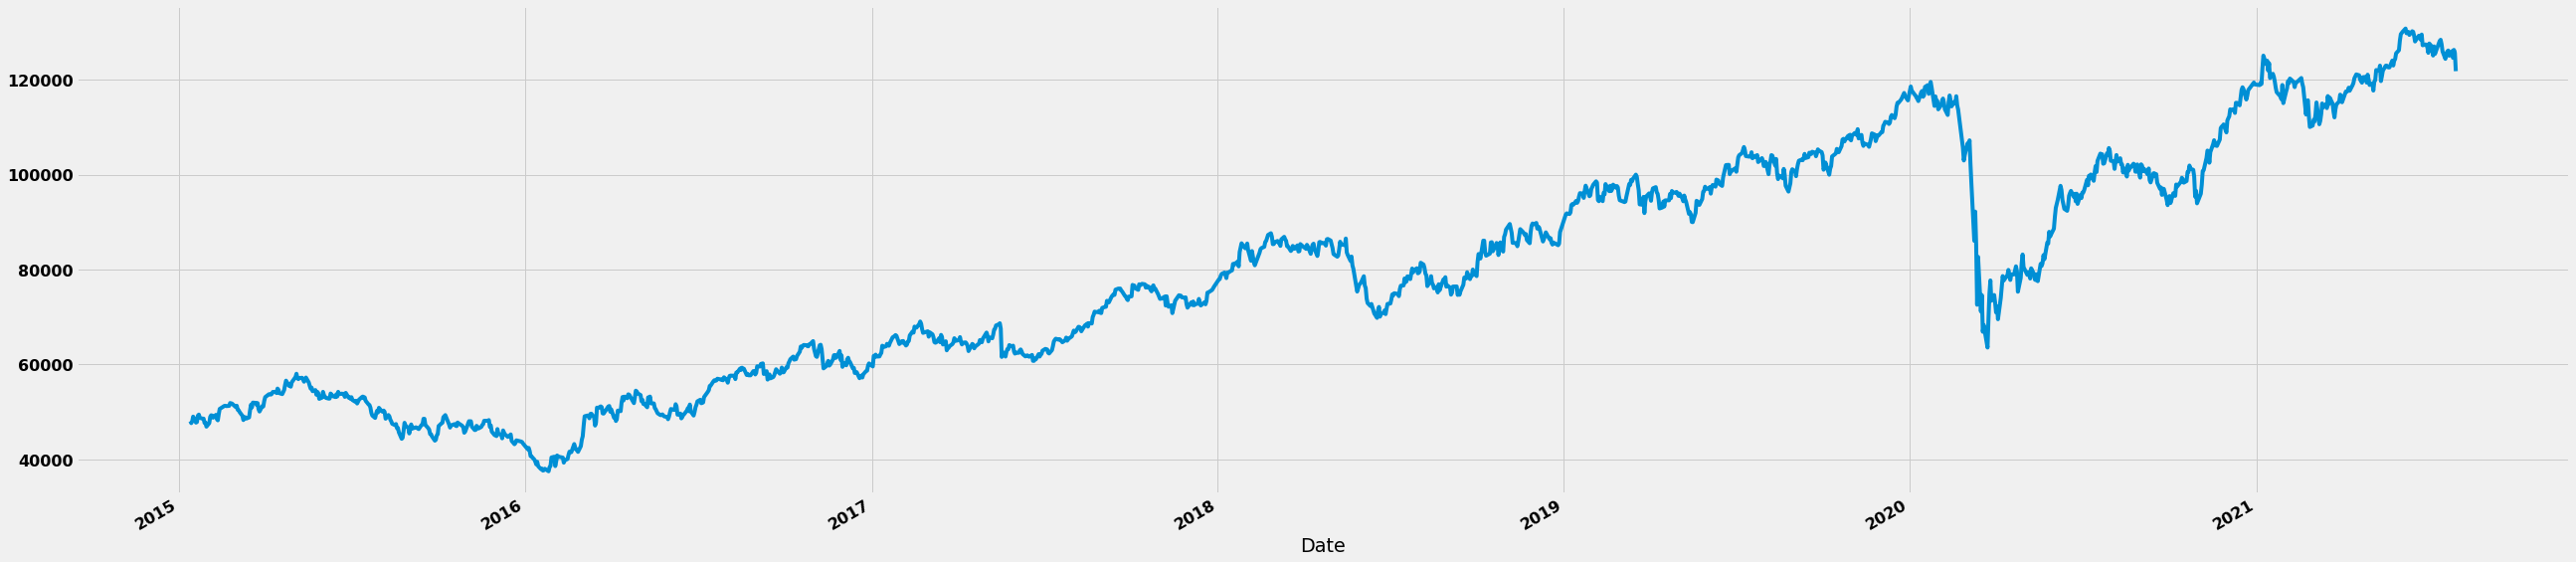

In [179]:
ibov.plot()

In [180]:
# Com a mesma janela de tempo o ibov possui mais dados que
# as acoes, entao por nao saber como tratar isso a principio,
# fiz um filtro apenas com datas coincidentes

df_pred = pd.concat([df_pred, ibov], axis=1, join='inner')
df_pred.columns = ['Close', 'Volume', 'Volatilidade', 'IBOV']
df_pred

,Close,Volume,Volatilidade,IBOV
Date,,,,
2015-01-13,2.44,35000,NaN,48042.0
2015-01-14,2.40,35000,NaN,47646.0
2015-01-20,2.55,140000,NaN,47877.0
2015-01-22,3.08,175000,NaN,49443.0
2015-01-23,3.23,35000,0.386458,48775.0
...,...,...,...,...
2021-07-26,53.54,36530,0.945632,126004.0
2021-07-27,53.06,36064,0.329090,124612.0
2021-07-28,53.37,22644,0.301877,126286.0


In [181]:
# Adicona uma coluna de predicao com lag de 30 dias
lag = 30
df_pred['Predicao'] = df_pred['Close'].shift(-lag)
df_pred['Predicao'].tail(35)

Date
2021-06-11    53.54
2021-06-14    53.06
2021-06-15    53.37
2021-06-16    52.25
2021-06-17    53.83
2021-06-18      NaN
2021-06-21      NaN
2021-06-22      NaN
2021-06-23      NaN
2021-06-24      NaN
2021-06-25      NaN
2021-06-28      NaN
2021-06-29      NaN
2021-06-30      NaN
2021-07-01      NaN
2021-07-02      NaN
2021-07-05      NaN
2021-07-06      NaN
2021-07-07      NaN
2021-07-08      NaN
2021-07-12      NaN
2021-07-13      NaN
2021-07-14      NaN
2021-07-15      NaN
2021-07-16      NaN
2021-07-19      NaN
2021-07-20      NaN
2021-07-21      NaN
2021-07-22      NaN
2021-07-23      NaN
2021-07-26      NaN
2021-07-27      NaN
2021-07-28      NaN
2021-07-29      NaN
2021-07-30      NaN
Name: Predicao, dtype: float64

In [183]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 937 entries, 2015-01-13 to 2021-07-30
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Close         937 non-null    float64
 1   Volume        937 non-null    int64  
 2   Volatilidade  933 non-null    float64
 3   IBOV          937 non-null    float64
 4   Predicao      907 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 43.9 KB


In [199]:
# Substituindo os valores NaN de volatilidade pela media da coluna
df_pred['Volatilidade'] = df_pred['Volatilidade'].replace(np.nan, np.mean(df_pred['Volatilidade']))

In [185]:
df_pred.columns

Index(['Close', 'Volume', 'Volatilidade', 'IBOV', 'Predicao'], dtype='object')

In [186]:
X = np.array(df_pred[['Close', 'IBOV', 'Volatilidade', 'Volume']][:-lag])

# Como a variacao de escalas entre as fetures é muito grande
# vou tomar logaritomo das colunas para atenuar a variacao
X = np.log(X)
X

array([[ 0.89199804, 10.77983091, -0.24106675, 10.46310334],
       [ 0.87546874, 10.77155396, -0.24106675, 10.46310334],
       [ 0.93609336, 10.7763905 , -0.24106675, 11.8493977 ],
       ...,
       [ 3.90560244, 11.77598948, -0.48021275, 10.6016969 ],
       [ 3.91022138, 11.76957342, -0.54358401,  9.86323831],
       [ 3.91720953, 11.76023076, -0.69973033, 10.1690007 ]])

In [187]:
y = np.array(df_pred['Predicao'][:-lag])
y

array([ 8.11,  8.  ,  7.95,  8.17,  8.13,  8.03,  7.89,  8.35,  8.7 ,
        8.3 ,  8.52,  7.76,  7.63,  7.66,  7.72,  7.68,  7.84,  7.84,
        8.33,  8.15,  9.  ,  9.39,  9.14,  9.68,  9.75,  9.24,  9.33,
        9.29,  9.35,  9.64,  9.42,  9.24,  9.31,  8.93,  8.75,  8.95,
        8.62,  8.33,  8.27,  7.9 ,  7.73,  7.35,  7.51,  7.41,  7.  ,
        6.57,  7.06,  6.79,  6.95,  7.38,  7.3 ,  7.04,  7.54,  7.61,
        7.33,  6.99,  7.21,  7.29,  7.19,  7.32,  7.53,  7.45,  7.51,
        7.73,  7.42,  7.6 ,  7.7 ,  6.74,  6.75,  6.63,  6.34,  6.44,
        6.39,  6.4 ,  6.14,  6.23,  6.42,  6.5 ,  7.02,  7.15,  7.05,
        6.62,  6.19,  5.81,  6.01,  6.48,  6.32,  6.31,  6.31,  5.58,
        5.71,  5.65,  5.63,  5.75,  5.97,  6.15,  5.97,  6.11,  6.04,
        6.  ,  6.13,  6.15,  6.2 ,  6.13,  6.28,  6.29,  6.24,  6.29,
        6.32,  6.52,  6.44,  6.12,  6.26,  6.41,  6.61,  6.83,  6.47,
        6.37,  7.54,  7.72,  7.95,  8.06,  7.98,  7.79,  7.78,  7.91,
        7.95,  7.92,

In [188]:
len_treino = int(np.ceil( len(df_stock) * .8 )) # 80% do dataset para treino e 20% para teste
len_treino

750

In [189]:
X_train = X[:len_treino]
y_train = y[:len_treino]

X_test = X[len_treino:]
y_test = y[len_treino:]

In [190]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((750, 4), (750,), (157, 4), (157,))

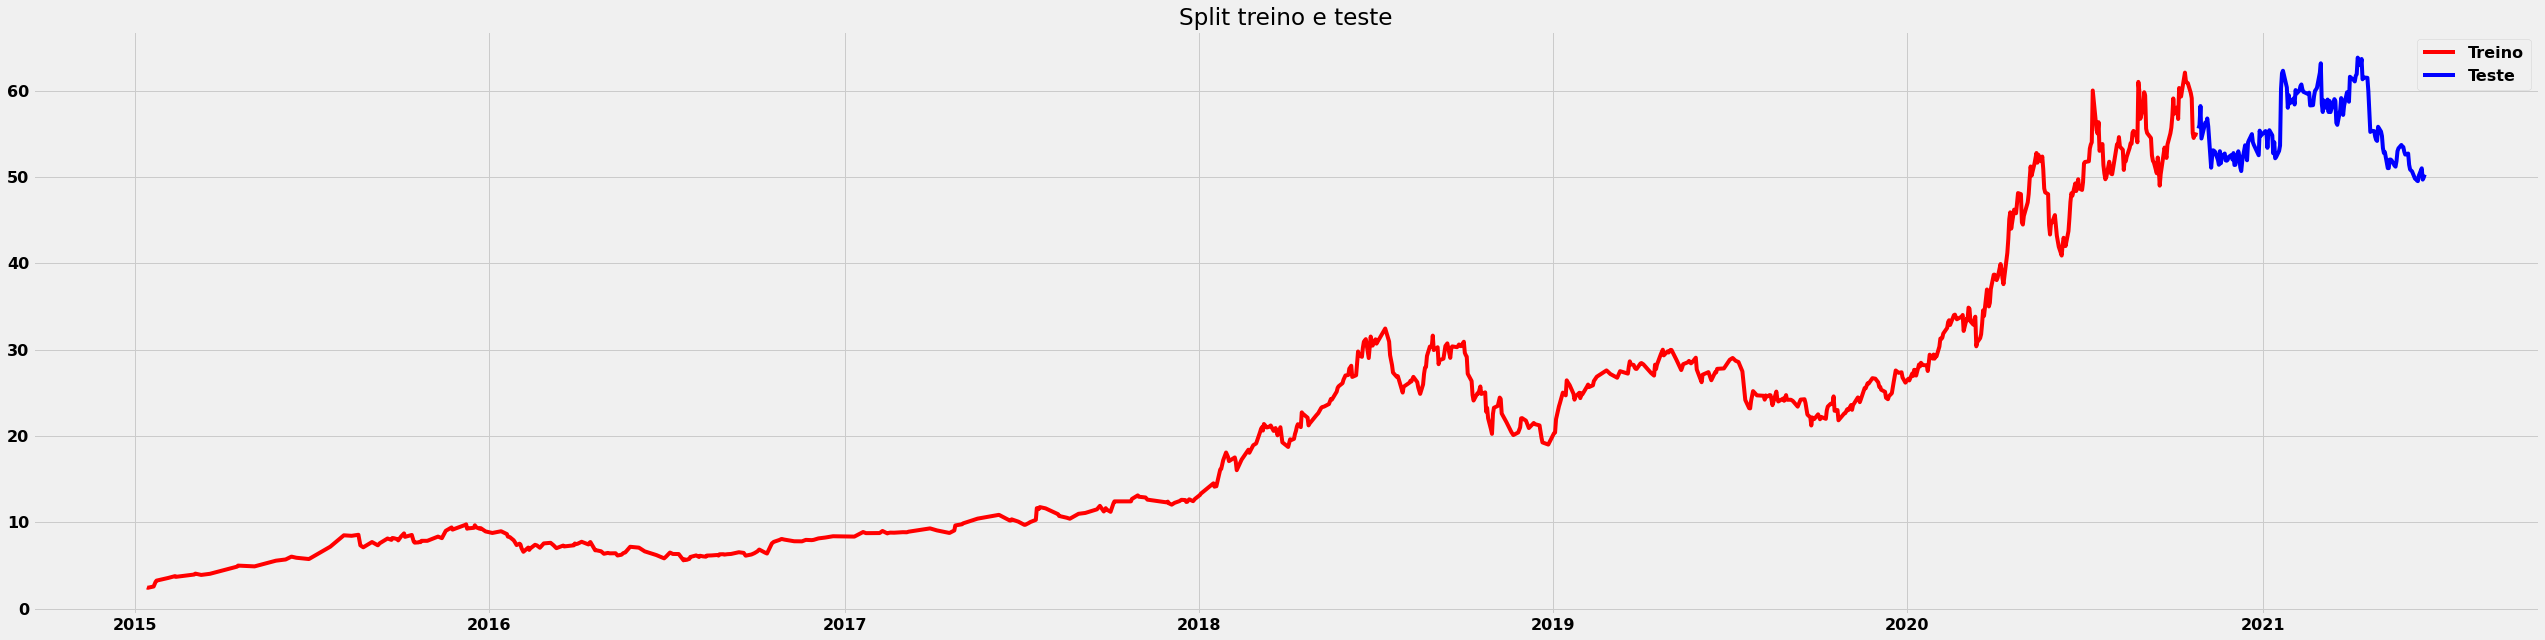

In [191]:
plt.plot(df_pred['Close'][:-lag][:len_treino], c='r', label='Treino')
plt.plot(df_pred['Close'][:-lag][len_treino:], c='b', label='Teste')
p = plt.legend()
p = plt.title('Split treino e teste')

In [192]:
# SVM
modeloSVM = SVR(kernel='rbf', gamma=.1, C=1e3)
modeloSVM.fit(X_train, y_train)

SVR(C=1000.0, gamma=0.1)

In [193]:
confSVM = modeloSVM.score(X_test, y_test)
print(f'Desempenho do modelo SV (O ideal é 1.0): {confSVM}')

Desempenho do modelo SV (O ideal é 1.0): -1.0347905230568029


In [194]:
predictSVM = modeloSVM.predict(X_test)

In [195]:
# Regressao Linear
modeloRegLin = LinearRegression()
modeloRegLin.fit(X_train, y_train)

LinearRegression()

In [196]:
confRegLin = modeloRegLin.score(X_test, y_test)
print(f'Desempenho do modelo SV (O ideal é 1.0): {confRegLin}')

Desempenho do modelo SV (O ideal é 1.0): -4.662408863333774


In [197]:
predictRegLin = modeloRegLin.predict(X_test)

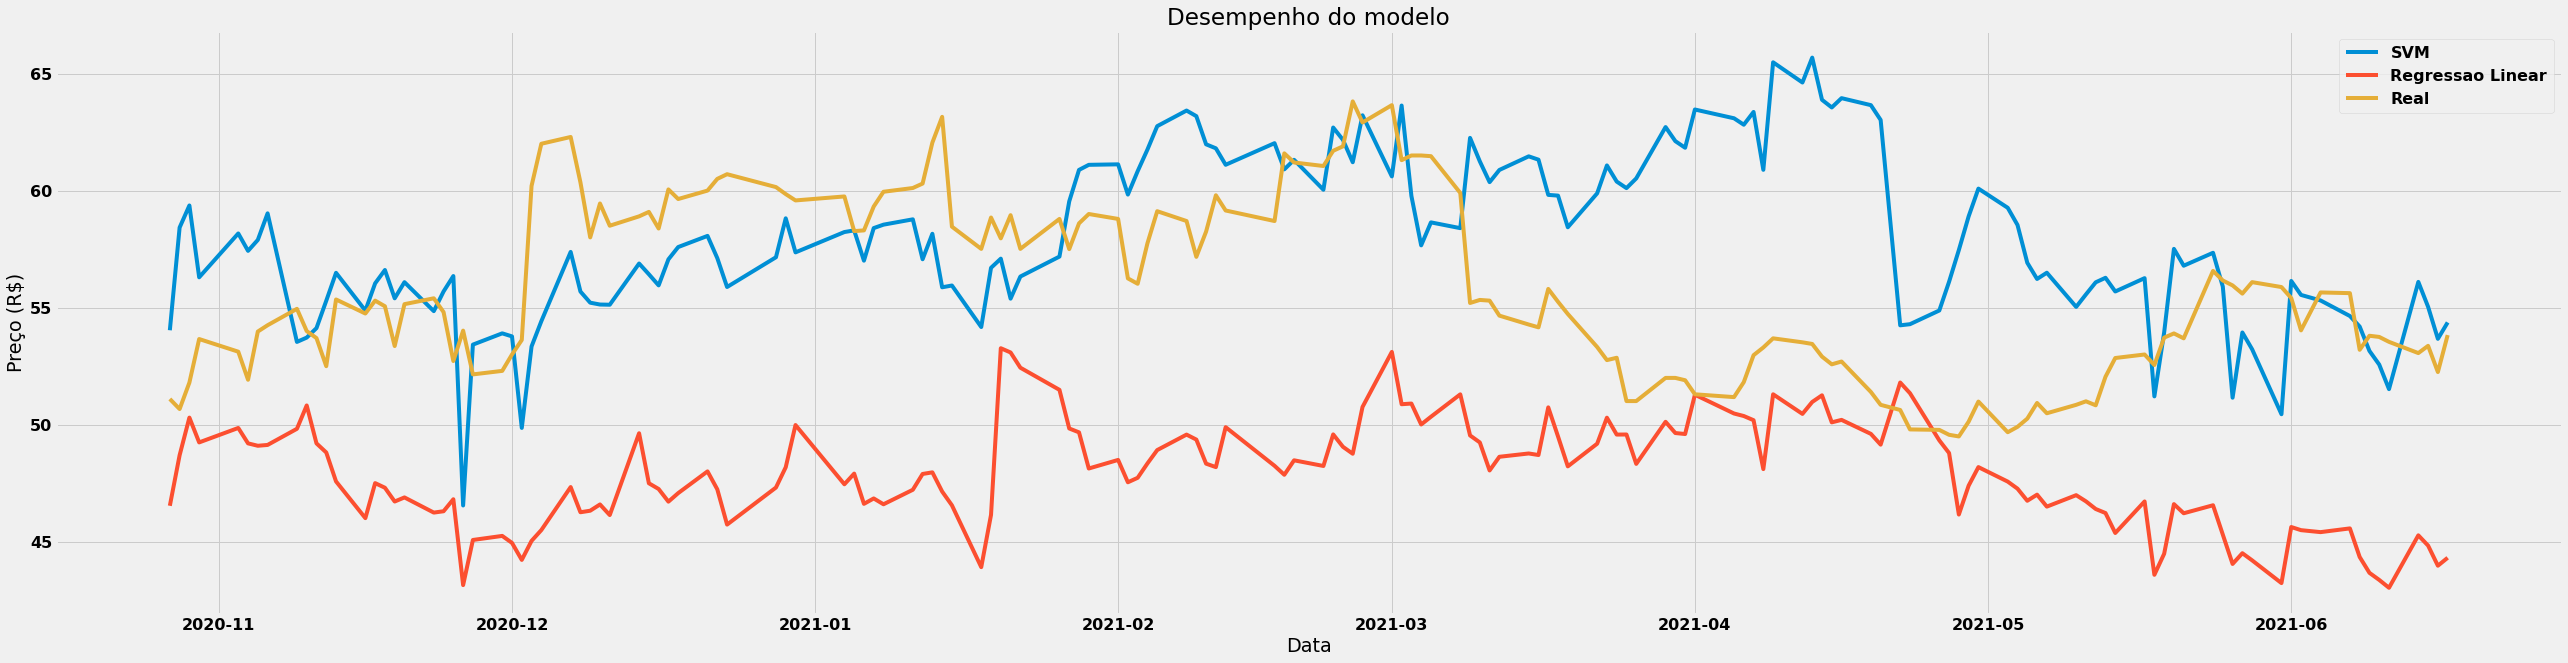

In [198]:
eixo_x = np.array(df_pred.index[:-lag][len_treino:])
plt.plot(eixo_x, predictSVM, label='SVM')
plt.plot(eixo_x, predictRegLin, label='Regressao Linear')
plt.plot(eixo_x, y_test, label='Real')
plt.legend()
plt.title('Desempenho do modelo')
plt.xlabel('Data')
p = plt.ylabel('Preço (R$)')

comentarios ...

## LSTM

E por fim te desafiamos a implementar uma arquitetura de redes neurais para dados sequências: LSTM. Podem tomar como referência esse notebook, podem copiar o código, o intuito dessa etapa é que vocês tenham um contato com Deep Learning. (https://drive.google.com/file/d/1uagMXYRMJTdMJwoQbQD5LVfrYj4aUuSF/view?usp=sharing)

In [484]:
#!pip install keras

In [485]:
#!pip install tensorflow

In [486]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as rmse

In [487]:
len_treino = math.ceil(len(df_stock) * .7)
len_treino

656

In [488]:
df_stock.iloc[:len_treino]['Close'].tail()

Date
2020-06-04    42.51
2020-06-05    41.90
2020-06-08    40.88
2020-06-09    42.17
2020-06-10    42.94
Name: Close, dtype: float64

In [489]:
df_stock.iloc[len_treino:]['Close'].head()

Date
2020-06-12    41.98
2020-06-15    43.72
2020-06-16    45.26
2020-06-17    47.07
2020-06-18    48.10
Name: Close, dtype: float64

In [490]:
treino = df_stock.filter(['Close']).iloc[:len_treino]
teste = df_stock.filter(['Close']).iloc[len_treino:]

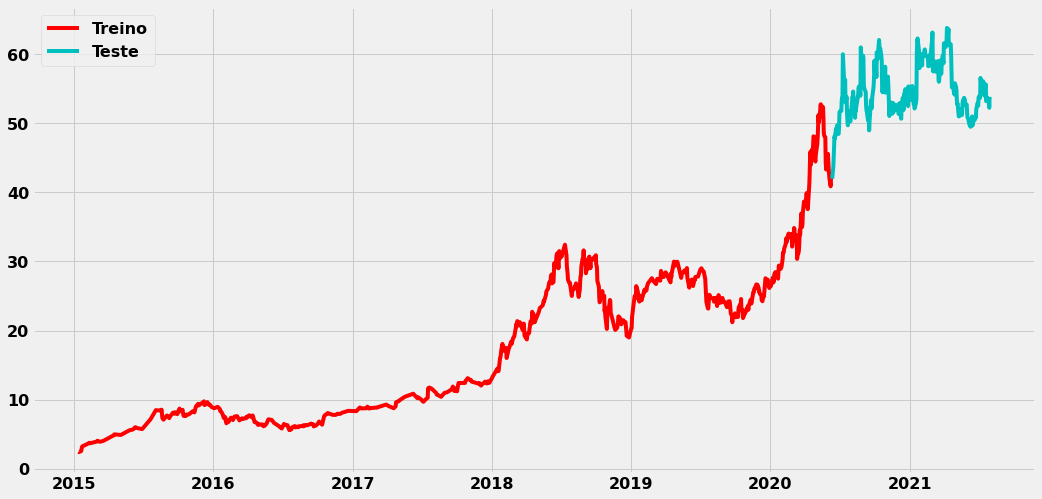

In [491]:
plt.figure(figsize=(16,8))
plt.plot(treino, c='r', label='Treino')
plt.plot(teste, c = 'c', label='Teste')
p = plt.legend()

In [492]:
treino, teste = treino.values, teste.values

In [493]:
sc = MinMaxScaler(feature_range=(0, 1))
treino_scale = sc.fit_transform(treino)
teste_scale = sc.fit_transform(teste)

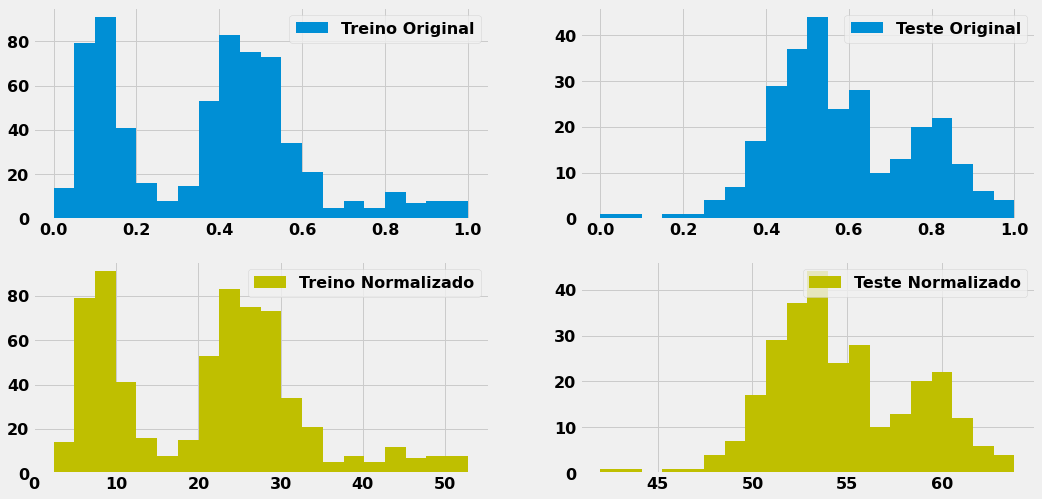

In [494]:
fig, ax = plt.subplots(2, 2, figsize=(16,8))
g = ax[0, 0].hist(treino_scale, bins=20, label='Treino Original')
g = ax[1, 0].hist(treino, bins=20, label='Treino Normalizado', color='y')
g = ax[0, 0].legend()
g = ax[1, 0].legend()

g = ax[0, 1].hist(teste_scale, bins=20, label='Teste Original')
g = ax[1, 1].hist(teste, bins=20, label='Teste Normalizado', color='y')
g = ax[0, 1].legend()
g = ax[1, 1].legend()

In [495]:
X_train, y_train = [], []

for feat in range(10, len(treino_scale)):
    X_train.append(treino_scale[feat-10:feat])
    y_train.append(treino_scale[feat, 0])

In [496]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [497]:
X_train.shape

(646, 10, 1)

In [498]:
modelo = Sequential()
modelo.add(LSTM(50, 
                return_sequences=True, 
                input_shape=(X_train.shape[1], 1)))
modelo.add(LSTM(50, return_sequences=False))
modelo.add(Dense(25))
modelo.add(Dense(1))

In [499]:
# https://keras.io/api/optimizers/
modelo.compile(optimizer='sgd', loss='mean_squared_error')

In [500]:
modelo.fit(X_train, y_train, epochs=15)

Epoch 1/15
21/21 [==============================] - 5s 21ms/step - loss: 0.0883
Epoch 2/15
21/21 [==============================] - 0s 21ms/step - loss: 0.0493
Epoch 3/15
21/21 [==============================] - 0s 21ms/step - loss: 0.0458
Epoch 4/15
21/21 [==============================] - 0s 21ms/step - loss: 0.0425
Epoch 5/15
21/21 [==============================] - 0s 22ms/step - loss: 0.0396
Epoch 6/15
21/21 [==============================] - 0s 23ms/step - loss: 0.0367
Epoch 7/15
21/21 [==============================] - 0s 20ms/step - loss: 0.0340
Epoch 8/15
21/21 [==============================] - 0s 21ms/step - loss: 0.0315
Epoch 9/15
21/21 [==============================] - 0s 23ms/step - loss: 0.0291
Epoch 10/15
21/21 [==============================] - 0s 22ms/step - loss: 0.0268
Epoch 11/15
21/21 [==============================] - 0s 22ms/step - loss: 0.0246
Epoch 12/15
21/21 [==============================] - 0s 21ms/step - loss: 0.0224
Epoch 13/15
21/21 [==================

In [501]:
X_test = []
y_test = np.reshape(teste, len(teste))[:271]

for feat in range(10, len(teste_scale)):
    X_test.append(teste_scale[feat-10:feat])

In [502]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [503]:
X_test.shape

(271, 10, 1)

In [504]:
ypredict = modelo.predict(X_test)
ypredict = sc.inverse_transform(ypredict)

In [505]:
rmse(ypredict, y_test)

13.614786520632608

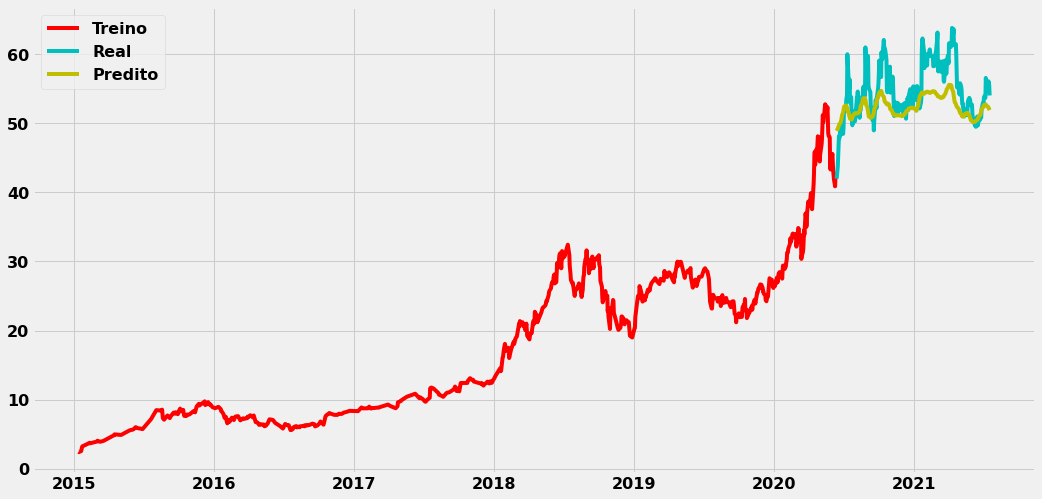

In [509]:
treino_ = df_stock.filter(['Close']).iloc[:len_treino]
teste_ = df_stock.filter(['Close']).iloc[len_treino:].iloc[:271]
teste_['predict'] = ypredict

plt.figure(figsize=(16,8))
plt.plot(treino_, c='r', label='Treino')
plt.plot(teste_['Close'], c = 'c', label='Real')
plt.plot(teste_['predict'], c = 'y', label='Predito')
p = plt.legend()